In [2]:
import sys
sys.path.append('/datascience/home/ssaha/')

import numpy as np

import time
import sys
import warnings
import datetime
import gc
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import os
import seaborn as sns
from pathlib import Path
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn 
import os

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, log_loss, recall_score, roc_curve, roc_auc_score, confusion_matrix,classification_report 
from sklearn.metrics import  adjusted_mutual_info_score, balanced_accuracy_score
from sklearn.metrics import fbeta_score

import pickle

import data_prep 
import data_summary
import lime_ModelExplainer
import data_split
import reading_data
import eda
from lime_ModelExplainer import lime_explainer
%matplotlib inline

/root/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.


In [3]:
from config_param import project_identifier
from directoryPath import mlresult_dir, parent_dir, parent_dir_project, mlresult_dir,  data_dir, input_dir, mlobjects
import directoryPath

In [4]:
import sys
sys.path.append('/datascience/home/ssaha/Test/')
sys.path.append('/datascience/home/ssaha/')


In [5]:
import os
import data_prep

In [129]:
start=time.time()
df_2017= reading_data.read_data(path="/datascience/home/ssaha/input/c360_customeradt_in_market_lexus_082017/")
print(time.time()- start)
#X_imputed = imputer.fit_transform(X)

139.91101384162903


In [130]:
start=time.time()
y_app_2017 = df_2017["dep_purchase_lexus_new_luv_6mo"]
print(time.time()- start)

0.0007281303405761719


In [131]:
gc.collect()

0

In [132]:
start=time.time()
X_app_2017=data_prep.find_indep_feat(df_2017)
print(time.time()- start)

110.51235938072205


In [133]:
gc.collect()

0

In [134]:
del df_2017

In [135]:
categorical_list = X.select_dtypes(include="O").columns.tolist()
numerical_list = X.select_dtypes(exclude="O").columns.tolist()

In [136]:
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))

Number of categorical features: 0
Number of numerical features: 197


In [15]:
numerical_list

['customer_id',
 'no_owned_vehicle',
 'no_new_purchase_vehicle',
 'no_used_purchase_vehicle',
 'no_cpo_purchase_vehicle',
 'avg_assoc_length',
 'max_assoc_length',
 'no_sales_dealer_assoc',
 'days_since_last_purchase_vehicle',
 'days_since_last_sold_vehicle',
 'avg_zip3_vehicle_val',
 'owned_lexus_sedan_ind',
 'owned_lexus_LUV_ind',
 'owned_lexus_new_luv_ind',
 'owned_lexus_cpo_luv_ind',
 'owned_lexus_new_sedan_ind',
 'owned_lexus_cpo_sedan_ind',
 'owned_toyota_ind',
 'owned_toyota_scion_ind',
 'owned_lexus_ind',
 'owned_scion_ind',
 'owned_camry_ind',
 'owned_corolla_ind',
 'owned_rav4_ind',
 'owned_prius_ind',
 'owned_truck_ind',
 'owned_suv_ind',
 'owned_hybrid_ind',
 'owned_big_engine_vehicle_ind',
 'owned_4wd_vehicle_ind',
 'multiple_vehicle_type_ind',
 'owned_lexus_sedan_no',
 'owned_lexus_LUV_no',
 'owned_camry_no',
 'owned_prius_no',
 'owned_hybrid_no',
 'ever_brand_migration_ind',
 'owned_tundra_ind',
 'owned_tacoma_ind',
 'owned_is250_ind',
 'owned_is350_ind',
 'owned_is_ind'

In [137]:
type_cat=['no_owned_vehicle',
'no_new_purchase_vehicle',
'no_used_purchase_vehicle',
'no_cpo_purchase_vehicle',
'no_sales_dealer_assoc',
'days_since_last_purchase_vehicle',
'days_since_last_sold_vehicle',
'owned_lexus_sedan_ind',
'owned_lexus_LUV_ind',
'owned_lexus_new_luv_ind',
'owned_lexus_cpo_luv_ind',
'owned_lexus_new_sedan_ind',
'owned_lexus_cpo_sedan_ind',
'owned_toyota_ind',
'owned_toyota_scion_ind',
'owned_lexus_ind',
'owned_scion_ind',
'owned_camry_ind',
'owned_corolla_ind',
'owned_rav4_ind',
'owned_prius_ind',
'owned_truck_ind',
'owned_suv_ind',
'owned_hybrid_ind',
'owned_big_engine_vehicle_ind',
'owned_4wd_vehicle_ind',
'multiple_vehicle_type_ind',
'owned_lexus_sedan_no',
'owned_lexus_LUV_no',
'owned_camry_no',
'owned_prius_no',
'owned_hybrid_no',
'ever_brand_migration_ind',
'owned_tundra_ind',
'owned_tacoma_ind',
'owned_is250_ind',
'owned_is350_ind',
'owned_is_ind',
'owned_es_ind',
'owned_rx_ind',
'owned_ls_ind',
'owned_gs_ind',
'owned_chr_ind',
'owned_chr_scion_ind',
'owned_highlander_ind',
'owned_sienna_ind',
'owned_4runner_ind',
'owned_avalon_ind',
'owned_hs250h_ind',
'owned_ct200h_ind',
'owned_white_vehicle_ind',
'owned_black_vehicle_ind',
'owned_silver_gray_vehicle_ind',
'owned_gold_brown_orange_vehicle_ind',
'owned_yellow_vehicle_ind',
'owned_green_vehicle_ind',
'owned_aqua_vehicle_ind',
'owned_blue_vehicle_ind',
'owned_purple_vehicle_ind',
'owned_brown_vehicle_ind',
'owned_gold_vehicle_ind',
'owned_red_vehicle_ind',
'owned_orange_vehicle_ind',
'owned_other_color_vehicle_ind',
'owned_gray_vehicle_ind',
'owned_vehicle_my_1970_80_ind',
'owned_vehicle_my_1981_90_ind',
'owned_vehicle_my_1991_00_ind',
'owned_vehicle_my_2001_10_ind',
'owned_vehicle_my_2011_20_ind',
'purchased_vehicle_last_2years_ind',
'no_vehicles_purchased_last_5yr',
'purchased_lexus_sedan_last_2years_ind',
'purchased_lexus_sedan_last_3years_ind',
'purchased_lexus_LUV_last_2years_ind',
'purchased_lexus_LUV_last_3years_ind',
'purchased_camry_last_2years_ind',
'purchased_camry_last_3years_ind',
'purchased_scion_last_2years_ind',
'purchased_scion_last_3years_ind',
'purchased_toyota_scion_last_3years_ind',
'purchased_lexus_last_3years_ind',
'purchased_rav4_last_3years_ind',
'purchased_is_last_3years_ind',
'current_owned_lexus_sedan_ind',
'current_owned_lexus_LUV_ind',
'current_owned_lexus_new_luv_ind',
'current_owned_lexus_new_sedan_ind',
'current_owned_lexus_cpo_luv_ind',
'current_owned_lexus_cpo_sedan_ind',
'current_owned_toyota_ind',
'current_owned_toyota_scion_ind',
'current_owned_lexus_ind',
'current_owned_scion_ind',
'current_owned_camry_ind',
'current_owned_corolla_ind',
'current_owned_rav4_ind',
'current_owned_prius_ind',
'current_owned_tundra_ind',
'current_owned_tacoma_ind',
'current_owned_is_ind',
'current_owned_es_ind',
'current_owned_rx_ind',
'current_owned_ls_ind',
'current_owned_gs_ind',
'current_owned_chr_ind',
'current_owned_chr_scion_ind',
'current_owned_highlander_ind',
'current_owned_sienna_ind',
'current_owned_4runner_ind',
'current_owned_avalon_ind',
'past_owned_lexus_sedan_ind',
'past_owned_lexus_LUV_ind',
'past_owned_lexus_new_luv_ind',
'past_owned_lexus_new_sedan_ind',
'past_owned_lexus_cpo_luv_ind',
'past_owned_lexus_cpo_sedan_ind',
'past_owned_toyota_ind',
'past_owned_toyota_scion_ind',
'past_owned_lexus_ind',
'past_owned_scion_ind',
'past_owned_camry_ind',
'past_owned_corolla_ind',
'past_owned_rav4_ind',
'past_owned_prius_ind',
'past_owned_tundra_ind',
'past_owned_tacoma_ind',
'past_owned_is_ind',
'past_owned_es_ind',
'past_owned_rx_ind',
'past_owned_ls_ind',
'past_owned_gs_ind',
'past_owned_chr_ind',
'past_owned_chr_scion_ind',
'past_owned_highlander_ind',
'past_owned_sienna_ind',
'past_owned_4runner_ind',
'past_owned_avalon_ind',
'purchased_vehicle_new_ind',
'purchased_vehicle_used_ind',
'purchased_vehicle_cpo_ind',
'purchased_vehicle_toyota_ind',
'purchased_vehicle_lexus_ind',
'purchased_vehicle_scion_ind',
'purchased_vehicle_truck_ind',
'purchased_vehicle_suv_ind',
'purchased_vehicle_hybrid_ind',
'purchased_vehicle_big_engine_ind',
'purchased_vehicle_4wd_ind',
'purchased_vehicle_lexus_sedan_ind',
'purchased_vehicle_lexus_LUV_ind',
'purchased_vehicle_camry_ind',
'purchased_vehicle_corolla_ind',
'purchased_vehicle_rav4_ind',
'purchased_vehicle_prius_ind',
'first_purchase_ind',
'first_purchase_lexus_sedan_ind',
'first_purchase_lexus_LUV_ind',
'first_purchase_toyota_ind',
'first_purchase_scion_ind',
'first_purchase_lexus_ind',
'first_purchase_camry_ind',
'first_purchase_hybrid_ind',
'first_purchase_prius_ind',
'first_purchase_big_engine_ind',
'first_purchase_suv_ind',
'days_since_first_purchase_vehicle',
'no_leased_vehicle',
'last_sales_dealer_region',
'dofu_year1_ind',
'dofu_year2_ind',
'dofu_year3_ind',
'dofu_year4_ind',
'dofu_year5_ind',
'dofu_year5above_ind',
'toyota_care_status',
'days_lapsed_toyota_care_expiry',
'days_remain_toyota_care_expiry',
'tc_completed_ind',
'tc_active_ind',
'no_tc_completed',
'tc_only1_ind',
'tc_only2_ind',
'tc_only3_ind',
'tc_only4_ind',
'tc_only5_ind',
'no_ocpe',
'no_ocpe_email',
'no_ocpe_direct',
'no_ocpe_phone',
'first_purchase_luxury_vehicle_ind',
'owned_corolla_no',
'owned_luxury_no',
'owned_toyota_sedan_ind',
'owned_toyota_family_ind',
'owned_toyota_sport_ind',
'owned_toyota_compact_ind',
'owned_toyota_compactsuv_ind',
'owned_toyota_fullsizesuv_ind',
'owned_toyota_hybrid_ind',
'owned_toyota_luxurymidsize_ind',
'owned_toyota_midsize_ind',
'owned_toyota_midsizesuv_ind',
'owned_toyota_pickup_ind',
'owned_toyota_premiummidsize_ind',
'owned_toyota_sportscar_ind',
'owned_toyota_subcompact_ind',
'owned_toyota_subcompactsuv_ind',
'owned_toyota_van_ind',
'past_owned_toyota_compact_ind',
'past_owned_toyota_compactsuv_ind',
'past_owned_toyota_fullsizesuv_ind',
'past_owned_toyota_hybrid_ind',
'past_owned_toyota_luxurymidsize_ind',
'past_owned_toyota_midsize_ind',
'past_owned_toyota_midsizesuv_ind',
'past_owned_toyota_pickup_ind',
'past_owned_toyota_premiummidsize_ind',
'past_owned_toyota_sportscar_ind',
'past_owned_toyota_subcompact_ind',
'past_owned_toyota_subcompactsuv_ind',
'past_owned_toyota_van_ind',
'current_owned_toyota_compact_ind',
'current_owned_toyota_compactsuv_ind',
'current_owned_toyota_fullsizesuv_ind',
'current_owned_toyota_hybrid_ind',
'current_owned_toyota_luxurymidsize_ind',
'current_owned_toyota_midsize_ind',
'current_owned_toyota_midsizesuv_ind',
'current_owned_toyota_pickup_ind',
'current_owned_toyota_premiummidsize_ind',
'current_owned_toyota_sportscar_ind',
'current_owned_toyota_subcompact_ind',
'current_owned_toyota_subcompactsuv_ind',
'current_owned_toyota_van_ind',
'past_owned_toyota_4wd_ind',
'past_owned_toyota_family_ind',
'past_owned_toyota_sedan_ind',
'past_owned_toyota_sport_ind',
'past_owned_toyota_suv_ind',
'past_owned_toyota_truck_ind',
'first_purchase_sport_vehicle_ind',
'driver_ind',
'owner_ind',
'seeking_cred',
'avg_no_vehicles_per_hh',
'max_value_vehicles_per_hh',
'no_of_chldrn_cd',
'no_of_adlts_per_hh_cd',
'i1_occupation_grp_val',
'auto_in_the_market_cd',
'no_sales_survey',
'sales_survey_ind',
'no_service_survey',
'service_survey_ind',
'sales_would_return_ind',
'sales_would_recommend_ind',
'service_would_return_ind',
'service_would_recommend_ind',
'no_cc_cases',
'no_cc_types',
'days_since_last_case_open',
'avg_no_days_case_opened',
'max_no_days_case_opened',
'days_since_last_case_closed',
'multiple_case_type_ind',
'has_cec',
'no_communication_received',
'no_campaign_received',
'no_offer_received',
'days_since_last_communication',
'no_communication_opened',
'no_campaign_opened',
'no_communication_clicked',
'no_campaign_clicked',
'no_communication_opened_nd_clicked',
'no_campaign_opened_nd_clicked',
'no_communication_opened_nt_clicked',
'no_campaign_opened_nt_clicked',
'days_since_last_opened_campaign',
'days_since_last_clicked_campaign',
'no_campaign_active',
'no_campaign_expired',
'no_offers_active',
'no_offers_expired',
'lhr_incomplete_lead_ind',
'lhr_sweepstakes_1_permission_ind',
'lhr_max_days_between_leads',
'current_lead',
'current_handraiser',
'current_participator',
'ever_lead_ind',
'ever_handraiser_ind',
'ever_participator_ind',
'no_lead',
'days_since_first_lead',
'days_since_last_lead',
'no_handraiser',
'days_since_first_handraiser',
'days_since_last_handraiser',
'no_brochures_requested',
'days_since_last_brochure_request',
'has_emd',
'days_since_first_communication',
'no_communication_received_toyota',
'no_communication_dates_toyota',
'days_since_first_communication_toyota',
'no_communication_received_lexus',
'no_communication_dates_lexus',
'days_since_first_communication_lexus',
'no_communication_opened_toyota',
'no_campaign_opened_toyota',
'no_communication_opened_lexus',
'no_campaign_opened_lexus',
'no_communication_clicked_toyota',
'no_campaign_clicked_toyota',
'no_communication_clicked_lexus',
'no_campaign_clicked_lexus',
'days_since_last_communication_toyota',
'days_since_last_communication_lexus',
'no_email_campaign_received',
'no_directmail_campaign_received',
'no_web_campaign_received',
'no_email_campaign_received_toyota',
'no_directmail_campaign_received_toyota',
'no_web_campaign_received_toyota',
'no_email_campaign_received_lexus',
'no_directmail_campaign_received_lexus',
'no_web_campaign_received_lexus',
'no_distinct_communication_dates',
'no_distinct_communication_dates_toyota',
'no_distinct_communication_dates_lexus',
'communication_received_ind',
'campaign_received_ind',
'offer_received_ind',
'communication_opened_ind',
'communication_clicked_ind',
'campaign_opened_ind',
'campaign_clicked_ind',
'brochure_requested_ind',
'active_offer_ind',
'no_dlr_campgns',
'no_dlr_direct_mail_campgns',
'no_dlr_email_campgns',
'no_dlr_campgn_emails_opened',
'no_dlr_campgn_emails_clicked',
'no_dlr_campgn_emails_sent',
'no_dlr_campgn_emails_dropped',
'no_dlr_campgn_optout',
'no_days_since_lastro_recent',
'no_days_since_lastro',
'no_days_since_firstro',
'no_servicing_dealer',
'dealer_loyalist',
'no_repairs_under_warranty_most_recent_veh',
'no_repairs_after_warranty_most_recent_veh',
'avg_no_repairs_under_warranty',
'avg_no_repairs_after_warranty',
'no_ro_visits',
'no_ro_vehicle',
'no_cpro_visits',
'no_wpro_visits',
'no_ro_visit_during_tc',
'no_ro_visits_post_0_2_tc',
'no_ro_visits_post_2_4_tc',
'no_ro_visits_post_4_6_tc',
'no_ro_visits_post_over6_tc',
'last_serviced_dealer_no',
'last_serviced_dealer_region',
'ro_after_ocpe_ind',
'ever_customer_payment_ind',
'ever_warranty_payment_ind',
'ever_service_ind',
'ever_service_hybrid_ind',
'ever_service_lexus_sedan_ind',
'ever_service_lexus_LUV_ind',
'ever_service_camry_ind',
'ever_service_prius_ind',
'customer_high_payment_ind',
'warranty_high_payment_ind',
'high_service_ind',
'high_ro_time_ind',
'current_vehicle_serviced_ind',
'current_vehicle_customer_full_payment_ind',
'current_vehicle_high_service_ind',
'current_vehicle_high_ro_time_ind',
'pma_toy_scion_dealership_cd',
'pma_toy_scion_dealership_region',
'pma_lexus_dealership_cd',
'pma_lexus_dealership_region',
'customer_language_english_ind',
'customer_language_spanish_ind']

In [138]:
X.shape

(419151, 197)

In [18]:
categorical_list = X.select_dtypes(include="O").columns.tolist()
numerical_list = X.select_dtypes(exclude="O").columns.tolist()

In [19]:
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))

Number of categorical features: 467
Number of numerical features: 72


In [21]:
X.drop(['mail_adr_latitude','mail_adr_longitude', 'customer_zipcode'], axis=1, inplace=True)

In [22]:
cols_trans=['avg_zip3_vehicle_val','max_value_vehicles_per_hh', 'pma_lexus_dealership_cd']
X[cols_trans]=X[cols_trans].abs()

In [23]:
repnullvars=["no_owned_vehicle","no_new_purchase_vehicle","no_used_purchase_vehicle","no_cpo_purchase_vehicle",
"multiple_vehicle_type_ind",
"owned_is250_ind","owned_is350_ind","owned_hs250h_ind","owned_ct200h_ind",
"owned_white_vehicle_ind","owned_black_vehicle_ind","owned_silver_gray_vehicle_ind",
"owned_gold_brown_orange_vehicle_ind","owned_yellow_vehicle_ind",
"owned_green_vehicle_ind","owned_aqua_vehicle_ind","owned_blue_vehicle_ind",
"owned_purple_vehicle_ind","purchased_vehicle_last_2years_ind",
"no_ro_visits_48_60mo","no_ro_visits_36_48mo","no_ro_visits_24_36mo",
"no_ro_visits_18_24mo","no_ro_visits_12_18mo","no_ro_visits_6_12mo",
"no_ro_visits_0_6mo","no_ro_visits"]


In [25]:
categorical_list = X.select_dtypes(include="O").columns.tolist()
numerical_list = X.select_dtypes(exclude="O").columns.tolist()

In [26]:
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))

Number of categorical features: 465
Number of numerical features: 71


In [27]:
gc.collect()

88

In [ ]:
X[categorical_list]=X[categorical_list].apply(lambda x: x.fillna(0)) 

In [ ]:
repnonneg= ["avg_mileage_permonth_recent_vehicle","avg_cust_pay_12_18mo","total_cust_pay_12_18mo",
"avg_custpay_recent_vehicle","avg_cust_pay_18_24mo","total_cust_pay_18_24mo",
"avg_cust_pay_6_12mo","total_cust_pay_6_12mo","avg_cust_pay_0_6mo",
"total_cust_pay_0_6mo","max_cust_pay_12_18mo","max_cust_pay_18_24mo",
"max_cust_pay_0_6mo","max_cust_pay_6_12mo","avg_custpay",
"ratio_avg_cust_pay","total_cust_pay","avg_cust_pay_24_36mo",
"total_part_amt","avg_cust_pay_36_48mo","avg_cust_pay_48_60mo",
"first_purchase_age","days_since_last_case_closed","est_current_mileage",
"second_last_purchase_age","last_purchase_age","total_labor_amt",
"avg_ro_time_0_6mo","avg_ro_time_6_12mo","avg_ro_time_12_18mo",
"avg_warrpay_recent","avg_warrpay","total_warranty_pay",
"avg_ro_time_18_24mo","avg_no_days_case_opened",
"max_no_days_case_opened"]

In [ ]:
X[repnonneg]= X[repnonneg].abs()

In [ ]:
start=time.time()
X['visited_in_last_2years'] =  np.where(X['no_ro_visits_18_24mo'] + 
                                                         X['no_ro_visits_12_18mo'] + 
                                                         X['no_ro_visits_6_12mo'] + 
                                                         X['no_ro_visits_0_6mo'] > 0, 1, 0)
X['visited_in_last_2years']= X['visited_in_last_2years'].astype('O')
X.drop(['no_ro_visits_18_24mo','no_ro_visits_12_18mo', 'no_ro_visits_6_12mo', 'no_ro_visits_0_6mo'], axis=1,inplace=True, errors=False)

X['visited_in_last_5years'] =  np.where(X['no_ro_visits_48_60mo'] + 
                                                         X['no_ro_visits_36_48mo'] + 
                                                         X['no_ro_visits_24_36mo'] > 0, 1, 0)
X['visited_in_last_5years']= X['visited_in_last_5years'].astype('O')
X.drop(['no_ro_visits_24_36mo', 'no_ro_visits_36_48mo', 'no_ro_visits_48_60mo'], axis=1,inplace=True, errors=False)


X['no_servicing_dealer'].fillna(0, inplace= True)
X['no_servicing_dealer'] = np.where(X['no_servicing_dealer'].astype('int')<=1, 1, 2)

X['owned_lexus_sedan_no']= np.where(X['owned_lexus_sedan_no']==0, 0, (np.where(['owned_lexus_sedan_no']==1,1,2)))

X['owned_lexus_LUV_no']= np.where(X['owned_lexus_LUV_no']==0, 0, (np.where(['owned_lexus_LUV_no']==1,1,2)))

X['no_owned_vehicle'] = X['no_owned_vehicle'].astype('O')
X['no_new_purchase_vehicle'] = X['no_new_purchase_vehicle'].astype('O')


X['no_owned_vehicle']= np.where(X['no_owned_vehicle']==0,0, (np.where(X['no_owned_vehicle']==1,1, (np.where(X['no_owned_vehicle']==2,2, (np.where(X['no_owned_vehicle']==3,3, np.where(X['no_owned_vehicle']==5,5,'6+'))))))))

# binning ro visits
bins = [-np.inf,0,1,2,3,np.inf]
names = [0,1,2,3,4]
X['no_ro_vistis'] = pd.cut(X['no_ro_visits'], bins, labels=names)
X.drop(['avg_custpay', 'avg_custpay_recent_vehicle'],axis=1, inplace= True)
X[['no_of_chldrn_cd', 'avg_no_vehicles_per_hh', 'no_of_adlts_per_hh_cd']]= X[['no_of_chldrn_cd', 'avg_no_vehicles_per_hh', 'no_of_adlts_per_hh_cd']].astype('O')

print(time.time()- start)

In [ ]:
categorical_list = X.select_dtypes(include="O").columns.tolist()
numerical_list = X.select_dtypes(exclude="O").columns.tolist()

In [ ]:
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))

In [ ]:
start_time= time.time()
X[categorical_list]=X[categorical_list].apply(lambda x : x.fillna('Not Present')) 
print(time.time()- start)

start_time= time.time()
X[numerical_list]=X[numerical_list].apply(lambda x: x.replace([np.inf, -np.inf], np.nan))
X[numerical_list]=X[numerical_list].apply(lambda x : x.fillna(x.mean()))  #if x.dtype.kind in 'bOSU' else fill_NaN.fit_transform(x)
print(time.time()- start)

In [ ]:
print('Number of categorical features:', str(len(X.select_dtypes(include="O").columns.tolist())))
print('Number of numerical features:', str(len(X.select_dtypes(exclude="O").columns.tolist())))

In [ ]:
X.to_pickle(mlresult_dir + str(project_identifier) + '_' + str(datetime.datetime.now().day)+ 'X_imputed_app.pkl')

In [ ]:
y_2017.to_pickle(mlresult_dir + str(project_identifier) + '_' + str(datetime.datetime.now().day)+ 'y_new_luv_app.pkl')

In [ ]:
len(X.isnull().sum()*100/X.shape[0])

In [ ]:
start=time.time()
X_encoded= data_prep.label_encode(X)
print(time.time()- start)

In [ ]:
X_encoded_abs=X_encoded.abs()

In [ ]:
X_encoded_abs.to_hdf(mlresult_dir + str(project_identifier) + '_' + str(datetime.datetime.now().day)+ '_X_encoded_app.h5', key= 'df')

### 80:20 Balanced 50 Feats through select k best f_classify

### Keeping columns similar to training set

In [ ]:
cols= []

In [ ]:
X_80_20_50vars_fclassify_app= pd.DataFrame()
col_not_found=[]
for col in cols:
    if col in X_encoded.columns:
        X_80_20_50vars_fclassify_app[col]=X_encoded[col].copy()
    else:
        col_not_found.append(col)

In [ ]:
X_80_20_50vars_fclassify_app.shape

In [ ]:
col_not_found

In [108]:
test= pd.concat([X_h5.reset_index(drop=True), y_h5.reset_index(drop=True)], axis=1)

In [109]:
test.shape

(5070955, 258)

In [110]:
test.head()

,active_brand,association_type,last_sales_dealer_markettype,marital_status,marital_status_confidence,i1_education_confidence,home_ownership,presence_of_children,creditcard_cd,gndr_cd,...,noros_high_ro_time_0_6mo,avg_mileage_permonth_recent_vehicle,est_current_mileage,avg_service_assoc_length,last_serviced_dealer_no,last_serviced_dealer_region,pma_toy_scion_dealership_cd,pma_toy_scion_dealership_region,pma_lexus_dealership_cd,dep_purchase_lexus_new_luv_6mo
0,-0.622455,-0.600296,1.866616,-0.659082,-0.364961,-1.487035,-0.210103,-0.190859,0.463681,0.676845,...,-6.412111e-01,-0.051872,-0.153909,-1.306075e+00,3.816403e-01,5.830639e-02,-0.727694,0.760767,0.307273,0
1,-0.622455,-0.600296,-0.093857,1.723322,-1.722904,0.600903,-0.210103,1.759789,0.463681,0.676845,...,1.951197e-16,-0.001436,-0.000946,7.770049e-16,5.348864e-15,-1.824737e-15,0.694600,-0.682256,0.417435,0
2,-0.622455,-0.600296,-0.093857,-0.659082,0.992982,0.600903,-0.210103,-0.190859,0.463681,0.676845,...,1.951197e-16,-0.001436,-0.000946,7.770049e-16,5.348864e-15,-1.824737e-15,5.157756,-1.361325,2.267375,0
3,-0.622455,-0.600296,-0.093857,-0.659082,0.992982,0.600903,-0.210103,-0.190859,0.463681,-1.095187,...,1.951197e-16,-0.001436,-0.000946,7.770049e-16,5.348864e-15,-1.824737e-15,5.157756,-1.361325,2.267375,0
4,-0.622455,-0.600296,-0.093857,-0.659082,0.992982,0.600903,-0.210103,-0.190859,0.463681,-1.095187,...,1.951197e-16,-0.001436,-0.000946,7.770049e-16,5.348864e-15,-1.824737e-15,5.157756,-1.361325,2.267375,0


In [112]:
DecisionTree_pkl_filename = os.path.join(mlobjects+'DecisionTree_.pkl')
dt_model_pkl = open(DecisionTree_pkl_filename, 'rb')
dt = pickle.load(dt_model_pkl)
print ("Loaded Decision tree model :: ", dt)

Loaded Decision tree model ::  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [145]:
y_pred_dt= dt.predict(X_h5)

In [146]:
gc.collect()

4574

In [147]:
acc =accuracy_score(y_pred= y_pred_dt, y_true=y_h5) * 100
print('accuracy ', acc)

accuracy  60.97186821811671


In [148]:
#f1_score
f1=f1_score(y_pred= y_pred_dt, y_true=y_h5, average='macro')  * 100
print('f1_score ' + str(f1))

f1_score 39.22637813975103


In [150]:
#precision_score
prec=precision_score(y_pred= y_pred_dt, y_true=y_h5, average='weighted')* 100
print('precision_score ', prec)

precision_score  98.64797933761447


In [151]:
#recall_score
recall=recall_score(y_pred= y_pred_dt, y_true=y_h5)*100
print('recall_score ' , recall)

recall_score  65.86935487500281


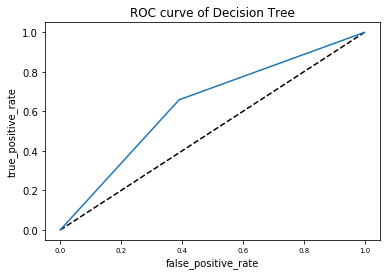

In [152]:
#roc_curve
y_pred_proba_dt = dt.predict_proba(X_h5)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=y_h5, y_score=y_pred_proba_dt)
plt.plot([0,1],[0,1],'k--')
plt.plot(false_positive_rate,true_positive_rate, label='Decision Tree')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.title('ROC curve of Decision Tree' )
plt.show()

In [153]:
#roc_auc_score
roc= roc_auc_score(y_h5, y_pred_proba_dt) * 100
print('roc_auc_score ' + str(roc))

roc_auc_score 63.3989614323336


In [154]:
#confusion_matrix
print('confusion_matrix ', confusion_matrix(y_h5, y_pred_dt))

confusion_matrix  [[3062583 1963931]
 [  15168   29273]]


In [133]:
pd.crosstab(sample_y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
class_report= classification_report(sample_y,y_pred)
print("classification_report"+ str(class_report))

classification_report              precision    recall  f1-score   support

           0       0.99      0.60      0.75      5006
           1       0.02      0.63      0.04        65

   micro avg       0.60      0.60      0.60      5071
   macro avg       0.51      0.61      0.39      5071
weighted avg       0.98      0.60      0.74      5071



In [156]:
for name, importance in zip(X_h5.columns, dt.feature_importances_):
    print(name, importance)

active_brand 0.004639223766507647
association_type 0.0003122857622719425
last_sales_dealer_markettype 0.0012588973856929846
marital_status 0.0016576618464561406
marital_status_confidence 0.0032848514935332174
i1_education_confidence 0.0017880212603426661
home_ownership 0.005621999928558216
presence_of_children 0.005255347679832398
creditcard_cd 0.0021517614578474677
gndr_cd 0.0037776449211794644
interest_in_fitness_cd 0.0013946062854326713
interest_in_outdoors_cd 0.0014422848207493394
interest_in_sports_cd 0.0015194730794767966
interest_in_golf_cd 0.0007756377528518741
tennis_cd 0.0005490662092954018
interest_in_skiing_cd 0.0012255220836191643
interest_in_cultural_arts_cd 0.001321696667343216
cruise_enthusiasts_cd 0.0007853994663319172
interest_in_music_cd 0.0006276615924246866
musical_class_opera_big_bnd_cd 0.0003939265146743859
music_country_cd 0.0008577470024525326
music_christian_cd 0.0007724345167342192
music_oldies_cd 0.00035550198043277987
music_rock_cd 0.0009854860850981465
pho

### Random Forest

In [162]:
rf_pkl_filename = os.path.join(mlobjects+'rf.pkl')
rf_pkl = open(rf_pkl_filename, 'rb')
rf = pickle.load(rf_pkl)
print ("Loaded RF tree model :: ", rf)

Loaded RF tree model ::  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


In [165]:
#confusion_matrix

print('confusion_matrix ', confusion_matrix(y_h5, rf.predict(X_h5)))

confusion_matrix  [[4196582  829932]
 [  19312   25129]]


In [166]:
#roc_auc_score
y_pred_proba_rf = rf.predict_proba(X_h5)[:,1]
roc= roc_auc_score(y_h5, y_pred_proba_rf) * 100
print('roc_auc_score ' + str(roc))

roc_auc_score 78.71725563999871


In [167]:
for name, importance in zip(X_h5.columns, rf.feature_importances_):
    print(name, importance)

active_brand 0.0016118708448338626
association_type 0.0015416332996434534
last_sales_dealer_markettype 0.0004038589074716195
marital_status 0.0010558012734255668
marital_status_confidence 0.0016433128056787744
i1_education_confidence 0.0006414553483208116
home_ownership 0.0006286121877979504
presence_of_children 0.0015581689887299486
creditcard_cd 0.00030060906943900773
gndr_cd 0.0013993679302158391
interest_in_fitness_cd 0.0004324670912969634
interest_in_outdoors_cd 0.00039937595282466416
interest_in_sports_cd 0.0008055395801777951
interest_in_golf_cd 0.00018566003686964832
tennis_cd 0.0
interest_in_skiing_cd 3.195888526974744e-05
interest_in_cultural_arts_cd 9.163896704633973e-05
cruise_enthusiasts_cd 9.388462165730088e-05
interest_in_music_cd 0.0005870090222960773
musical_class_opera_big_bnd_cd 7.655816263602972e-05
music_country_cd 9.406293061009438e-05
music_christian_cd 1.8581797547864353e-05
music_oldies_cd 0.0
music_rock_cd 9.629225917295558e-05
photography_cd 5.145822111586197

### Adaboost

In [168]:
adaboost_pkl_filename = os.path.join(mlobjects+'adaboost.pkl')
adaboost_pkl = open(adaboost_pkl_filename, 'rb')
adaboost = pickle.load(adaboost_pkl)
print ("Loaded Adaboost model :: ", adaboost)

Loaded Adaboost model ::  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)


In [169]:
y_pred_ada= adaboost.predict(X_h5)

In [170]:
#confusion_matrix

print('confusion_matrix ', confusion_matrix(y_h5, y_pred_ada))

confusion_matrix  [[4222293  804221]
 [  20729   23712]]


In [174]:
#roc_auc_score
y_pred_proba_ada = adaboost.predict_proba(X_h5)[:,1]
roc= roc_auc_score(y_h5, y_pred_proba_ada) * 100
print('roc_auc_score ' + str(roc))

roc_auc_score 77.41474240130988


In [175]:
for name, importance in zip(X_h5.columns, adaboost.feature_importances_):
    print(name, importance)

active_brand 0.02
association_type 0.0
last_sales_dealer_markettype 0.0
marital_status 0.0
marital_status_confidence 0.0
i1_education_confidence 0.0
home_ownership 0.0
presence_of_children 0.0
creditcard_cd 0.0
gndr_cd 0.0
interest_in_fitness_cd 0.0
interest_in_outdoors_cd 0.0
interest_in_sports_cd 0.0
interest_in_golf_cd 0.0
tennis_cd 0.0
interest_in_skiing_cd 0.0
interest_in_cultural_arts_cd 0.0
cruise_enthusiasts_cd 0.0
interest_in_music_cd 0.0
musical_class_opera_big_bnd_cd 0.0
music_country_cd 0.0
music_christian_cd 0.0
music_oldies_cd 0.0
music_rock_cd 0.0
photography_cd 0.0
interest_in_travel_cd 0.0
dwelling_type 0.0
aged_parent_in_hh 0.0
home_business_ind 0.0
i1_business_owner_flg 0.0
presence_of_automobile_cd 0.0
healthy_living_cd 0.0
investors_cd 0.0
invest_in_mutual_fund_annts_cd 0.0
last_serviced_dealer_markettype 0.0
pma_toy_scion_dealership_markettype 0.0
pma_lexus_dealership_markettype 0.0
owned_lexus_sedan_ind 0.0
owned_lexus_LUV_ind 0.0
owned_lexus_new_luv_ind 0.0
owne

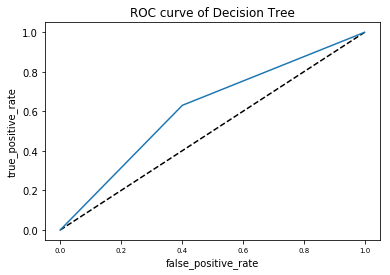

In [141]:
#roc_curve
y_pred_proba_ada = dt.predict_proba(sample_X)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=sample_y, y_score=y_pred_proba_ada)
plt.plot([0,1],[0,1],'k--')
plt.plot(false_positive_rate,true_positive_rate, label='Decision Tree')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.title('ROC curve of Decision Tree' )
plt.show()

### SGD


In [188]:
sgd_pkl_filename = os.path.join(mlobjects+'SGD.pkl')
sgd_pkl = open(sgd_pkl_filename, 'rb')
sgd = pickle.load(sgd_pkl)
print ("Loaded sgd model :: ", sgd)

Loaded sgd model ::  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [189]:
y_pred_sgd= sgd.predict(X_h5)

In [190]:
#confusion_matrix

print('confusion_matrix ', confusion_matrix(y_h5, y_pred_sgd))

confusion_matrix  [[3365496 1661018]
 [  12102   32339]]


In [191]:
#roc_auc_score
y_pred_proba_sgd = sgd.predict_proba(X_h5)[:,1]
roc= roc_auc_score(y_h5, y_pred_proba_sgd) * 100
print('roc_auc_score ' + str(roc))

roc_auc_score 70.12935508495029


### XGB


In [177]:
xgb_pkl_filename = os.path.join(mlobjects+'xgb.pkl')
xgb_pkl = open(xgb_pkl_filename, 'rb')
xgb = pickle.load(xgb_pkl)
print ("Loaded XGB model :: ", xgb)

Loaded XGB model ::  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=0, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)


In [178]:
y_pred_xgb= xgb.predict(X_h5)

In [179]:
#confusion_matrix

print('confusion_matrix ', confusion_matrix(y_h5, y_pred_xgb))

confusion_matrix  [[4483807  542707]
 [  25644   18797]]


In [180]:
#roc_auc_score
y_pred_proba_xgb = xgb.predict_proba(X_h5)[:,1]
roc= roc_auc_score(y_h5, y_pred_proba_xgb) * 100
print('roc_auc_score ' + str(roc))

roc_auc_score 77.40592580569363


In [182]:
for name, importance in zip(X_h5.columns, xgb.feature_importances_):
    print(name, importance)

active_brand 0.004297994
association_type 0.015759312
last_sales_dealer_markettype 0.0
marital_status 0.0
marital_status_confidence 0.0014326648
i1_education_confidence 0.0
home_ownership 0.0028653296
presence_of_children 0.0
creditcard_cd 0.0
gndr_cd 0.0057306592
interest_in_fitness_cd 0.0
interest_in_outdoors_cd 0.0
interest_in_sports_cd 0.0
interest_in_golf_cd 0.0
tennis_cd 0.0
interest_in_skiing_cd 0.0
interest_in_cultural_arts_cd 0.0
cruise_enthusiasts_cd 0.0
interest_in_music_cd 0.0
musical_class_opera_big_bnd_cd 0.0
music_country_cd 0.0
music_christian_cd 0.0
music_oldies_cd 0.0
music_rock_cd 0.0
photography_cd 0.0
interest_in_travel_cd 0.0
dwelling_type 0.0
aged_parent_in_hh 0.0
home_business_ind 0.0
i1_business_owner_flg 0.0
presence_of_automobile_cd 0.0
healthy_living_cd 0.0
investors_cd 0.0
invest_in_mutual_fund_annts_cd 0.0
last_serviced_dealer_markettype 0.0
pma_toy_scion_dealership_markettype 0.0
pma_lexus_dealership_markettype 0.0
owned_lexus_sedan_ind 0.0
owned_lexus_LU

### MLP


In [192]:
mlpc_pkl_filename = os.path.join(mlobjects+'mlpc.pkl')
mlpc_pkl = open(mlpc_pkl_filename, 'rb')
mlpc = pickle.load(mlpc_pkl)
print ("Loaded MLPC model :: ", mlpc)

Loaded MLPC model ::  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [193]:
y_pred_mlpc= mlpc.predict(X_h5)

In [194]:
#confusion_matrix

print('confusion_matrix ', confusion_matrix(y_h5, y_pred_mlpc))

confusion_matrix  [[2932835 2093679]
 [   7499   36942]]


In [196]:
#roc_auc_score
y_pred_proba_mlpc = mlpc.predict_proba(X_h5)[:,1]
roc= roc_auc_score(y_h5, y_pred_proba_mlpc) 
print('roc_auc_score ' + str(roc))

roc_auc_score 0.7741027933284734


### GB


In [197]:
gb_pkl_filename = os.path.join(mlobjects+'mlpc.pkl')
gb_pkl = open(gb_pkl_filename, 'rb')
gb = pickle.load(gb_pkl)
print ("Loaded MLPC model :: ", mlpc)

Loaded MLPC model ::  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [198]:
y_pred_gb= gb.predict(X_h5)

In [199]:
#confusion_matrix

print('confusion_matrix ', confusion_matrix(y_h5, y_pred_gb))

confusion_matrix  [[2932835 2093679]
 [   7499   36942]]


In [200]:
#roc_auc_score
y_pred_proba_gb = mlpc.predict_proba(X_h5)[:,1]
roc= roc_auc_score(y_h5, y_pred_proba_gb) 
print('roc_auc_score ' + str(roc))

roc_auc_score 0.7741027933284734


### H2o

In [202]:
h2o_model = h2o.load_model(mlobjects + 'RM_h2o_classification')

In [ ]:
test_h2o= h2o.H2OFrame(test)

/datascience/home/ssaha/h2o/utils/shared_utils.py:170: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



In [204]:
y_pred_h2o = h2o_model.predict(test_h2o)

ValueError: test_data must be an instance of H2OFrame

In [28]:
X_old= pd.read_hdf(mlresult_dir + 'c360_customeradt_in_market_lexus_25_X_2017.h5')

In [29]:
y_old= pd.read_hdf(mlresult_dir + 'c360_customeradt_in_market_lexus_25_y_2017.h5')

In [30]:
gc.collect()

22

In [31]:
X_old.shape

(5070955, 257)

In [35]:
X_old.head()

,active_brand,association_type,last_sales_dealer_markettype,marital_status,marital_status_confidence,i1_education_confidence,home_ownership,presence_of_children,creditcard_cd,gndr_cd,...,noros_high_ro_time_6_12mo,noros_high_ro_time_0_6mo,avg_mileage_permonth_recent_vehicle,est_current_mileage,avg_service_assoc_length,last_serviced_dealer_no,last_serviced_dealer_region,pma_toy_scion_dealership_cd,pma_toy_scion_dealership_region,pma_lexus_dealership_cd
0,-0.622455,-0.600296,1.866616,-0.659082,-0.364961,-1.487035,-0.210103,-0.190859,0.463681,0.676845,...,-6.258891e-01,-6.412111e-01,-0.051872,-0.153909,-1.306075e+00,3.816403e-01,5.830639e-02,-0.727694,0.760767,0.307273
1,-0.622455,-0.600296,-0.093857,1.723322,-1.722904,0.600903,-0.210103,1.759789,0.463681,0.676845,...,2.992520e-16,1.951197e-16,-0.001436,-0.000946,7.770049e-16,5.348864e-15,-1.824737e-15,0.694600,-0.682256,0.417435
2,-0.622455,-0.600296,-0.093857,-0.659082,0.992982,0.600903,-0.210103,-0.190859,0.463681,0.676845,...,2.992520e-16,1.951197e-16,-0.001436,-0.000946,7.770049e-16,5.348864e-15,-1.824737e-15,5.157756,-1.361325,2.267375
3,-0.622455,-0.600296,-0.093857,-0.659082,0.992982,0.600903,-0.210103,-0.190859,0.463681,-1.095187,...,2.992520e-16,1.951197e-16,-0.001436,-0.000946,7.770049e-16,5.348864e-15,-1.824737e-15,5.157756,-1.361325,2.267375
4,-0.622455,-0.600296,-0.093857,-0.659082,0.992982,0.600903,-0.210103,-0.190859,0.463681,-1.095187,...,2.992520e-16,1.951197e-16,-0.001436,-0.000946,7.770049e-16,5.348864e-15,-1.824737e-15,5.157756,-1.361325,2.267375


In [40]:
feats_r=["owned_lexus_LUV_no",
"owned_lexus_cpo_sedan_ind",
"active_brand",
"max_value_vehicles_per_hh",
"avg_no_repairs_under_warranty",
"owned_4wd_vehicle_ind",
"has_uss",
"avg_no_repairs_after_warranty",
"last_reported_mileage_recent_vehicle",
"days_since_last_purchase_vehicle",

"communication_clicked_ind",
"avg_cust_pay_0_6mo",
"avg_zip3_vehicle_val",
"no_ro_visits_24_36mo",
"last_purchase_vehicle_msrp",
"days_since_first_purchase_vehicle",
"no_cpro_visits",
"first_purchase_vehicle_msrp",
"est_current_mileage",
"no_repairs_under_warranty_most_recent_veh",
"no_repairs_after_warranty_most_recent_veh",
"presence_of_children",
"no_ro_visits_18_24mo",
"avg_mileage_permonth_recent_vehicle",
"avg_assoc_length",
"owned_lexus_sedan_no",
"avg_cust_pay_24_36mo",
"max_cust_pay_6_12mo",
"no_ro_visits_6_12mo",
"avg_custpay",
"generation_group",
"no_ro_visits_0_6mo",
"no_days_since_lastro_recent",
"avg_warrpay",
"max_service_assoc_length"]

In [42]:
import feature_selection

In [ ]:
feature_selection()

In [43]:
start= time.time()
df_train= pd.read_csv('/datascience/home/ssaha/input/df_learning_set_bal_newluv.csv')
print(time.time()-start)

11.52569842338562


In [46]:
df_train.head()

,dep_purchase_lexus_new_luv_6mo,dep_purchase_lexus_cpo_luv_6mo,dep_purchase_lexus_new_sedan_6mo,dep_purchase_lexus_cpo_sedan_6mo,customer_id,timeline,max_assoc_length,days_since_last_purchase_vehicle,owned_lexus_sedan_no,owned_lexus_luv_no,...,log_total_part_amt,log_total_labor_amt,log_avg_service_assoc_length,log_avg_no_repairs_under_warranty,log_avg_no_repairs_after_warranty,avg_custpay_to_warrpay_ratio,custpay_to_warrpay_ratio,cpro_visits_ratio,wpro_visits_ratio,avg_service_dealer_visits
0,1,0,1,0,1084,82015,4730.0,1005.0,5.0,3.0,...,8.018023,8.317585,4.812184,1.139434,-0.693147,4.043073,5.255995,0.448276,0.344828,7.25
1,1,0,0,0,203137,82015,1980.0,1980.0,2.0,1.0,...,9.069234,9.050480,3.912023,2.662588,1.203973,0.564343,1.161882,0.660377,0.320755,21.25
2,1,0,0,0,1011226,82015,2895.0,679.0,1.0,2.0,...,7.711204,7.348851,5.488938,0.916291,1.252763,0.201394,0.302091,0.250000,0.166667,12.00
3,1,0,0,0,1629698,82015,749.0,632.0,1.0,0.0,...,4.692631,4.774407,4.718499,1.386294,0.000000,1.083113,0.541557,0.250000,0.500000,4.00
4,1,0,0,0,2465949,82015,9439.0,NaN,2.0,0.0,...,6.233842,6.132074,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00


In [47]:
df_train['dep_purchase_lexus_new_luv_6mo'].value_counts()

0    293280
1    125871
Name: dep_purchase_lexus_new_luv_6mo, dtype: int64

In [51]:
X=data_prep.find_indep_feat(df_train)

In [52]:
X.shape

(419151, 197)

In [53]:
y=df_train['dep_purchase_lexus_new_luv_6mo'].copy()

In [117]:
X_imputed= missing_value_imputation(X, 'median', 0, 0)

Number of categorical features: 0
Number of numerical features: 197

 Time taken to execute the function is 19.44663119316101



In [96]:
X_imputed.shape

(419151, 197)

In [81]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

In [113]:
cat_cols=X_imputed.select_dtypes(include='O').columns.tolist()
num_cols=X_imputed.select_dtypes(exclude='O').columns.tolist()

In [109]:
for col in cat_cols:
    X_imputed[col].replace({0:'0'}, inplace=True)

In [111]:
X_encoded=pd.DataFrame(None)

In [112]:
X_encoded[cat_cols]= X_imputed[cat_cols].apply(lambda x : LabelEncoder().fit_transform(x))

In [114]:
X_encoded[num_cols]= X_imputed[num_cols].copy()

In [115]:
X_encoded.shape

(419151, 197)

In [121]:
X_encoded_r_selected=X_encoded[[
"no_new_purchase_vehicle",
"no_owned_vehicle",
"no_ro_visits_24_36mo",
"no_ro_visits_12_18mo",
"log_avg_no_repairs_under_warranty",
"new_vehicle_purchase_value",
"total_vehicle_purchase_value",
"no_days_since_lastro_recent",
"no_ro_visits_0_6mo",
"est_current_mileage",
"wpro_visits_ratio",
"no_ro_visits_48_60mo",
"last_reported_mileage_recent_vehicle",
"no_days_since_lastro",
"has_uss",
"owned_aqua_vehicle_ind",
"avg_no_repairs_after_warranty",
"owned_silver_gray_vehicle_ind",
"avg_assoc_length",
"avg_custpay_recent_vehicle",
"last_purchase_vehicle_msrp",
"purchased_vehicle_last_2years_ind",
"avg_cust_pay_6_12mo",
"avg_cust_pay_0_6mo",
"avg_warrpay_recent",
"cpro_visits_ratio",
"avg_ro_time_6_12mo",
"owned_lexus_new_luv_ind",
"current_owned_lexus_new_luv_ind",
"owned_vehicle_my_2011_20_ind",
"dofu_year1_ind",
"current_owned_lexus_luv_ind",
"ever_service_lexus_luv_ind",
"owned_lexus_luv_ind",
"visited_in_last_2years"]]

In [124]:
import mlModels

In [122]:
X_train, X_test,y_train, y_test= data_split.train_test_split(X_encoded_r_selected, y)

cross_val_score [0.78299111 0.78303882 0.78324559 0.78593014 0.78713895]
accuracy 78.3028591060045
balanced_accuracy_score 69.9477590058063
f1_score 71.5145998585416
precision_score 77.35414212843638
Log loss 7.493977316667332
recall_score 48.90781309357984


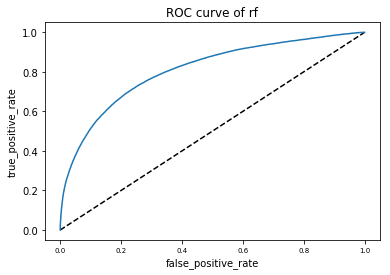

roc_auc_score 80.86884614479732
confusion_matrix [[66603  6597]
 [16139 15449]]
classification_report              precision    recall  f1-score   support

           0       0.80      0.91      0.85     73200
           1       0.70      0.49      0.58     31588

   micro avg       0.78      0.78      0.78    104788
   macro avg       0.75      0.70      0.72    104788
weighted avg       0.77      0.78      0.77    104788


 Time taken to execute the rf is 2.585141658782959

Dated on2019-01-21 06:45:12.073566



In [125]:
rf_rus_knn= mlModels.rf(X_train, y_train, X_test, y_test)

In [126]:
X_old_test= pd.read_hdf(mlresult_dir + 'c360_customeradt_in_market_lexus_25_X_2017.h5')

y_old_test = pd.read_hdf(mlresult_dir + 'c360_customeradt_in_market_lexus_25_y_2017.h5')

#### APP Data 2017

In [140]:
X_app_2017_imputed= data_prep.missing_value_imputation(X_app_2017, 'median', '0', 0) 

Number of categorical features: 75
Number of numerical features: 464

 Time taken to execute the function is 1562.0051181316376



In [141]:
gc.collect()

913

In [142]:
X_app_2017_encoded= data_prep.label_encode(X_app_2017_imputed)

Number of categorical features: 75

 Time taken to execute the function is 188.51187920570374



In [ ]:
X_app_2017_r_feats=X_app_2017_encoded[X_train.columns.tolist()].copy()

In [148]:
X_app_2017_encoded.to_pickle(mlresult_dir+ 'X_app_2017_encoded.pkl')

In [151]:
X_app_2017_encoded['avg_no_repairs_under_warranty'].replace({0:.001}, inplace=True)

In [152]:
X_app_2017_encoded['log_avg_no_repairs_under_warranty']=np.log(X_app_2017_encoded['avg_no_repairs_under_warranty'])

In [156]:
X_app_2017_encoded.rename({'current_owned_lexus_LUV_ind': 'current_owned_lexus_luv_ind'}, inplace=True)

In [163]:
df_app_2018= pd.read_csv('/datascience/home/ssaha/input/Eval_set_032018.csv')

In [160]:
y_app_2018= df_app_2018['dep_purchase_lexus_new_luv_6mo']

In [164]:
gc.collect()

7

In [162]:
X_app_2018= data_prep.find_indep_feat(X_app_2018)

In [165]:
X_app_2018_imputed= missing_value_imputation(X_app_2018, 'median', '0', 0)

Number of categorical features: 22
Number of numerical features: 183

 Time taken to execute the function is 248.17627143859863



In [166]:
X_app_2018_encoded= data_prep.label_encode(X_app_2018_imputed)

Number of categorical features: 22

 Time taken to execute the function is 40.0258686542511



In [173]:
X_app_2018_encoded.to_pickle(mlresult_dir+ 'X_app_2018_encoded.pkl')

In [167]:
X_app_2018_r_feats=X_app_2018_encoded[X_train.columns.tolist()].copy()

In [168]:
X_app_2018_r_feats.shape

(5252669, 35)

In [169]:
import model_evaluation

Provided model : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
accuracy  91.07236720988891
f1_score  51.64263611831411
precision_score  98.79561948500879
recall_score  48.68490394289273
confusion_matrix 
 [[4763406  447517]
 [  21422   20324]]
roc_auc_score 81.40670304868081


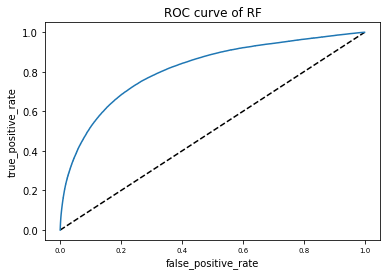

In [171]:
model_evaluation.model_evaluation_test(X_app_2018_r_feats, y_app_2018, rf_rus_knn, 'RF')

cross_val_score [0.7839136  0.78372274 0.7835796  0.78613691 0.78643911]
accuracy 78.34675726228194
balanced_accuracy_score 69.95938374259852
f1_score 71.5408738959882
precision_score 77.40677868469638
Log loss 7.478814911747005
recall_score 48.83816639230088


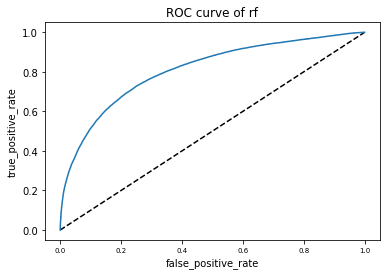

roc_auc_score 80.92184705093102
confusion_matrix [[66671  6529]
 [16161 15427]]
classification_report              precision    recall  f1-score   support

           0       0.80      0.91      0.85     73200
           1       0.70      0.49      0.58     31588

   micro avg       0.78      0.78      0.78    104788
   macro avg       0.75      0.70      0.72    104788
weighted avg       0.77      0.78      0.77    104788


 Time taken to execute the rf is 4.4494287967681885

Dated on2019-01-22 03:03:21.885897



In [172]:
rf_rus_knn= mlModels.rf(X_train, y_train, X_test, y_test, n_estimators=100)

Provided model : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
accuracy  81.89354345136037
f1_score  76.27297347596249
precision_score  81.44877054705195
recall_score  55.386442943054426
confusion_matrix 
 [[205223  14857]
 [ 42063  52220]]
roc_auc_score 87.80212513626105


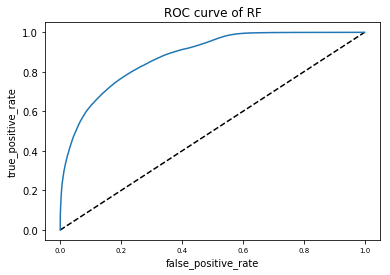

In [174]:
model_evaluation.model_evaluation_test(X_train, y_train, rf_rus_knn, 'RF')

Provided model : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
accuracy  91.03168313099494
f1_score  51.640430304868744
precision_score  98.79842460185448
recall_score  49.02745173190245
confusion_matrix 
 [[4761126  449797]
 [  21279   20467]]
roc_auc_score 81.47413033984667


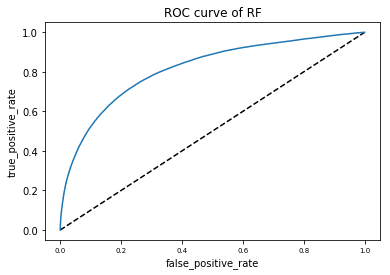

In [175]:
model_evaluation.model_evaluation_test(X_app_2018_r_feats, y_app_2018, rf_rus_knn, 'RF')

cross_val_score [0.78292749 0.78322969 0.78334102 0.78605739 0.7860892 ]
accuracy 78.35439172424323
balanced_accuracy_score 69.96844750133377
f1_score 71.55090796424876
precision_score 77.4156438677748
Log loss 7.476178031478757
recall_score 48.85082942889704


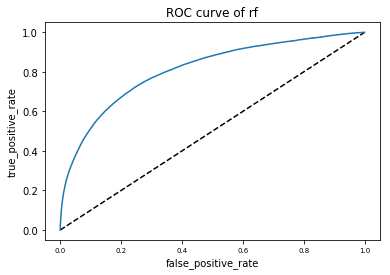

roc_auc_score 80.93840859882462
confusion_matrix [[66675  6525]
 [16157 15431]]
classification_report              precision    recall  f1-score   support

           0       0.80      0.91      0.85     73200
           1       0.70      0.49      0.58     31588

   micro avg       0.78      0.78      0.78    104788
   macro avg       0.75      0.70      0.72    104788
weighted avg       0.77      0.78      0.77    104788


 Time taken to execute the rf is 12.864693641662598

Dated on2019-01-22 03:28:36.006038



In [179]:
rf_rus_knn= mlModels.rf(X_train, y_train, X_test, y_test, n_estimators=120, min_samples_split=60, oob_score=True)

Provided model : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=60,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)
accuracy  81.2926457630192
f1_score  75.48007318706837
precision_score  80.76049947777774
recall_score  54.355504173605
confusion_matrix 
 [[204306  15774]
 [ 43035  51248]]
roc_auc_score 86.91803696837475


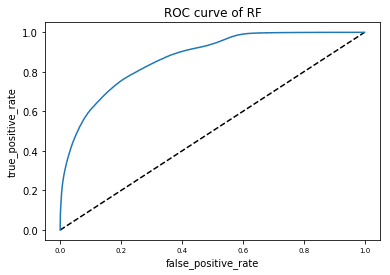

In [180]:
model_evaluation.model_evaluation_test(X_train, y_train, rf_rus_knn, 'RF')

Provided model : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=60,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)
accuracy  91.10901524539238
f1_score  51.66856127572412
precision_score  98.79602913484956
recall_score  48.694485699228665
confusion_matrix 
 [[4765327  445596]
 [  21418   20328]]
roc_auc_score 81.46257156753035


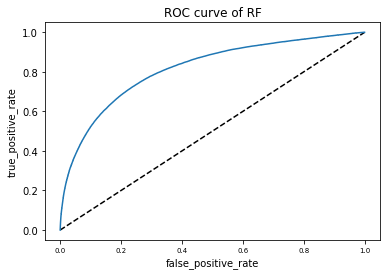

In [181]:
model_evaluation.model_evaluation_test(X_app_2018_r_feats, y_app_2018, rf_rus_knn, 'RF')

cross_val_score [0.78278434 0.7838977  0.78407265 0.785787   0.78575519]
accuracy 78.3849295720884
balanced_accuracy_score 70.01280091146185
f1_score 71.59731476591841
precision_score 77.45071148964902
Log loss 7.465630579081355
recall_score 48.92997340762315


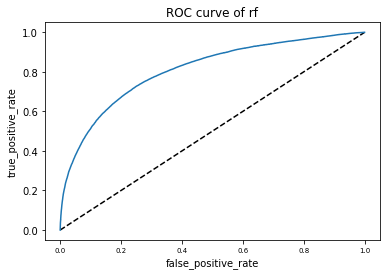

roc_auc_score 80.94957949030932
confusion_matrix [[66682  6518]
 [16132 15456]]
classification_report              precision    recall  f1-score   support

           0       0.81      0.91      0.85     73200
           1       0.70      0.49      0.58     31588

   micro avg       0.78      0.78      0.78    104788
   macro avg       0.75      0.70      0.72    104788
weighted avg       0.77      0.78      0.77    104788


 Time taken to execute the rf is 15.975252389907837

Dated on2019-01-22 03:37:30.819422



In [182]:
rf_rus_knn= mlModels.rf(X_train, y_train, X_test, y_test, n_estimators=150, min_samples_split=60, oob_score=True)

Provided model : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=60,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)
accuracy  81.34004319846801
f1_score  75.54229680524533
precision_score  80.81489775115294
recall_score  54.43505191816128
confusion_matrix 
 [[204380  15700]
 [ 42960  51323]]
roc_auc_score 86.93551805030567


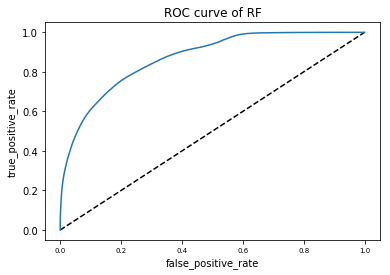

In [183]:
model_evaluation.model_evaluation_test(X_train, y_train, rf_rus_knn, 'RF')

Provided model : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=60,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)
accuracy  91.13195596372053
f1_score  51.690734023917926
precision_score  98.79700408670766
recall_score  48.77832606716811
confusion_matrix 
 [[4766497  444426]
 [  21383   20363]]
roc_auc_score 81.47661544901969


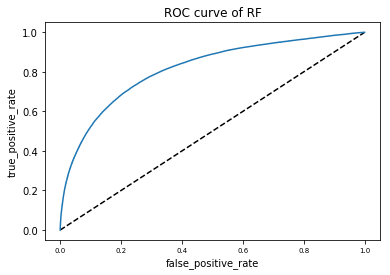

In [184]:
model_evaluation.model_evaluation_test(X_app_2018_r_feats, y_app_2018, rf_rus_knn, 'RF')

cross_val_score [0.78350007 0.78332512 0.78362731 0.785787   0.78577109]
accuracy 78.33530556934
balanced_accuracy_score 69.91969334000392
f1_score 71.50553743445809
precision_score 77.39473828883399
Log loss 7.482770010861389
recall_score 48.72736482208433


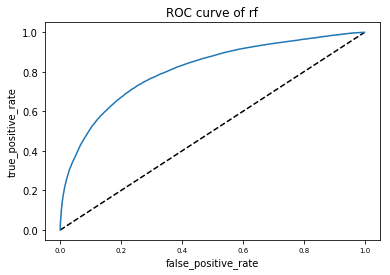

roc_auc_score 80.93010250312942
confusion_matrix [[66694  6506]
 [16196 15392]]
classification_report              precision    recall  f1-score   support

           0       0.80      0.91      0.85     73200
           1       0.70      0.49      0.58     31588

   micro avg       0.78      0.78      0.78    104788
   macro avg       0.75      0.70      0.72    104788
weighted avg       0.77      0.78      0.77    104788


 Time taken to execute the rf is 17.479515552520752

Dated on2019-01-22 04:57:15.610867



In [203]:
rf_rus_knn= mlModels.rf(X_train, y_train, X_test, y_test, n_estimators=180, min_samples_split=60, oob_score=True, max_depth=20)

Provided model : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=60,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)
accuracy  81.19498795977898
f1_score  75.3511713698933
precision_score  80.6485902927113
recall_score  54.18792359173976
confusion_matrix 
 [[204157  15923]
 [ 43193  51090]]
roc_auc_score 86.04968999840088


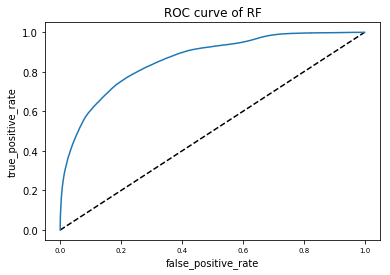

In [204]:
model_evaluation.model_evaluation_test(X_train, y_train, rf_rus_knn, 'RF')

Provided model : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=60,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)
accuracy  91.15967520511953
f1_score  51.69086990727341
precision_score  98.7949284163315
recall_score  48.52680496334978
confusion_matrix 
 [[4768058  442865]
 [  21488   20258]]
no_new_purchase_vehicle 0.10064955468770614
no_owned_vehicle 0.012959863200002104
no_ro_visits_24_36mo 0.02340300018017906
no_ro_visits_12_18mo 0.021333701046257224
log_avg_no_repairs_under_warranty 0.02700358070302816
new_vehicle_purchase_value 0.04653797493461792
total_vehicle_purchase_value 0.028420483075914174
no_days_since_lastro_recent 0.03302922374590675
no_ro_visits_0_6mo 0.00994639

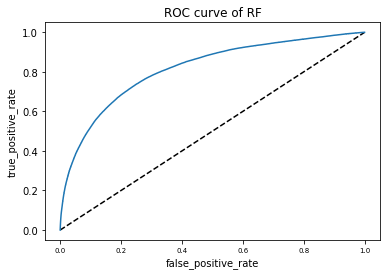

In [206]:
model_evaluation.model_evaluation_test(X_app_2018_r_feats, y_app_2018, rf_rus_knn, 'RF', feat_imp=True)

cross_val_score [0.78353188 0.7839136  0.7835796  0.78588243 0.78612101]
accuracy 78.3305340306142
balanced_accuracy_score 69.95856955432339
f1_score 71.53386306664369
precision_score 77.38712068448027
Log loss 7.4844184387447426
recall_score 48.876155502089404


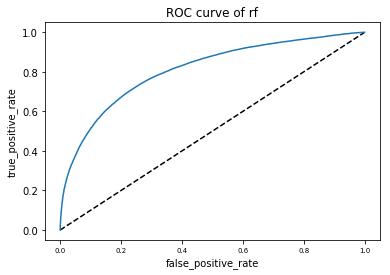

roc_auc_score 80.94920042092488
confusion_matrix [[66642  6558]
 [16149 15439]]
classification_report              precision    recall  f1-score   support

           0       0.80      0.91      0.85     73200
           1       0.70      0.49      0.58     31588

   micro avg       0.78      0.78      0.78    104788
   macro avg       0.75      0.70      0.72    104788
weighted avg       0.77      0.78      0.77    104788


 Time taken to execute the rf is 17.983380794525146

Dated on2019-01-22 04:46:49.874050



In [200]:
rf_rus_knn= mlModels.rf(X_train, y_train, X_test, y_test, n_estimators=150, min_samples_split=60, oob_score=True, criterion='entropy')

Provided model : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=60,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)
accuracy  81.3514949278382
f1_score  75.56048149250105
precision_score  80.82719639759041
recall_score  54.47111356236013
confusion_matrix 
 [[204382  15698]
 [ 42926  51357]]
roc_auc_score 87.13808182032908


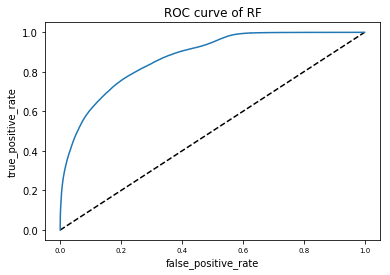

In [201]:
model_evaluation.model_evaluation_test(X_train, y_train, rf_rus_knn, 'RF')

Provided model : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=60,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)
accuracy  91.18724214299435
f1_score  51.701239086640506
precision_score  98.79411159285594
recall_score  48.41182388731855
confusion_matrix 
 [[4769554  441369]
 [  21536   20210]]
no_new_purchase_vehicle 0.09523260419335927
no_owned_vehicle 0.014557908439575851
no_ro_visits_24_36mo 0.020506109687673545
no_ro_visits_12_18mo 0.016749696885756497
log_avg_no_repairs_under_warranty 0.027712489811262647
new_vehicle_purchase_value 0.04548430088764455
total_vehicle_purchase_value 0.03352162343720628
no_days_since_lastro_recent 0.0412674695076898
no_ro_visits_0_6mo 0.0

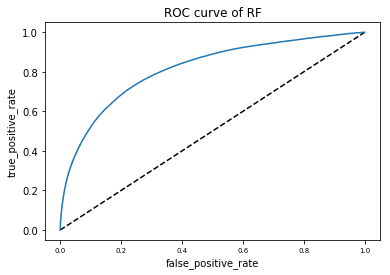

In [202]:
model_evaluation.model_evaluation_test(X_app_2018_r_feats, y_app_2018, rf_rus_knn, 'RF', feat_imp= True)

cross_val_score [0.78822388 0.78674471 0.78785806 0.78969971 0.79011325]
accuracy 78.72561743711111
balanced_accuracy_score 70.6642715882285
f1_score 72.23089540778413
precision_score 77.83403147640904
Log loss 7.347961891716104
recall_score 50.364062302140056


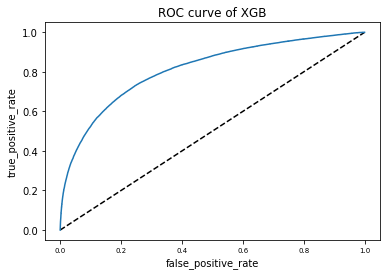

roc_auc_score 81.26715536559847
confusion_matrix [[66586  6614]
 [15679 15909]]
classification_report              precision    recall  f1-score   support

           0       0.81      0.91      0.86     73200
           1       0.71      0.50      0.59     31588

   micro avg       0.79      0.79      0.79    104788
   macro avg       0.76      0.71      0.72    104788
weighted avg       0.78      0.79      0.78    104788


 Time taken to execute the XGB is 28.046255111694336

Dated on2019-01-22 05:33:06.038500



In [225]:
xgb= mlModels.xgb(X_train, y_train, X_test, y_test, max_depth=8, learning_rate=0.1, n_estimators=180, booster='gbtree')

Provided model : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=0, n_estimators=180,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
accuracy  81.43770100170822
f1_score  75.83932875962765
precision_score  80.88590611495339
recall_score  55.51690124412673
confusion_matrix 
 [[203667  16413]
 [ 41940  52343]]
roc_auc_score 86.3362489070884


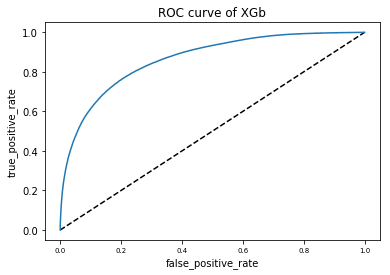

In [226]:
model_evaluation.model_evaluation_test(X_train, y_train, xgb, 'XGb')

Provided model : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=0, n_estimators=180,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
accuracy  91.03575725026649
f1_score  51.76321190912668
precision_score  98.81329135992743
recall_score  50.63479135725578
confusion_matrix 
 [[4760669  450254]
 [  20608   21138]]
no_new_purchase_vehicle 0.0071910773
no_owned_vehicle 0.011960669
no_ro_visits_24_36mo 0.011006751
no_ro_visits_12_18mo 0.009098914
log_avg_no_repairs_under_warranty 0.031662755
new_vehicle_purchase_value 0.059032872
total_vehicle_purchase_value 0.04633842
no_days_since_lastro_recent 0.0724978
no_ro_visits_0_6mo 0.007888172
est_current_mileage 0.062665105
wpro_visits_ratio 0.04156883
no_ro_visits_48_60mo 0.008

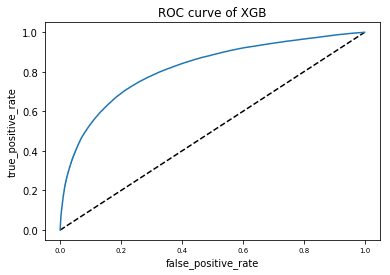

In [227]:
model_evaluation.model_evaluation_test(X_app_2018_r_feats, y_app_2018, xgb, 'XGB', feat_imp= True)

cross_val_score [0.7867129  0.787031   0.78844655 0.78927026 0.78825232]
accuracy 78.57006527464976
balanced_accuracy_score 70.51514037287453
f1_score 72.05443381523541
precision_score 77.65509602720196
Log loss 7.401688628591123
recall_score 50.23110041788021


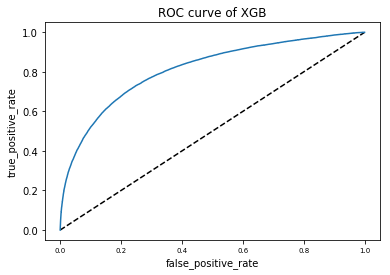

roc_auc_score 81.16607008108495
confusion_matrix [[66465  6735]
 [15721 15867]]
classification_report              precision    recall  f1-score   support

           0       0.81      0.91      0.86     73200
           1       0.70      0.50      0.59     31588

   micro avg       0.79      0.79      0.79    104788
   macro avg       0.76      0.71      0.72    104788
weighted avg       0.78      0.79      0.77    104788


 Time taken to execute the XGB is 25.52532935142517

Dated on2019-01-22 06:01:30.210065



In [232]:
xgb= mlModels.xgb(X_train, y_train, X_test, y_test, max_depth=7, learning_rate=0.1, n_estimators=190, booster='gbtree')

Provided model : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=0, n_estimators=190,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
accuracy  80.32592894201926
f1_score  74.38008968325079
precision_score  79.62686996033786
recall_score  53.60033091861736
confusion_matrix 
 [[201979  18101]
 [ 43747  50536]]
roc_auc_score 84.53704536536257


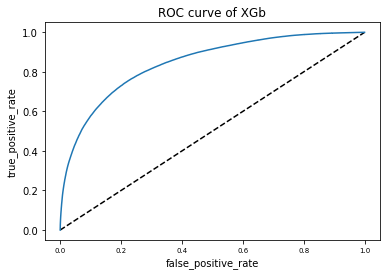

In [233]:
model_evaluation.model_evaluation_test(X_train, y_train, xgb, 'XGb')

Provided model : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=0, n_estimators=190,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
accuracy  90.9622517619138
f1_score  51.70104780028461
precision_score  98.81126335249839
recall_score  50.48387869496479
confusion_matrix 
 [[4756871  454052]
 [  20671   21075]]
no_new_purchase_vehicle 0.007924319
no_owned_vehicle 0.014190061
no_ro_visits_24_36mo 0.010320044
no_ro_visits_12_18mo 0.009582899
log_avg_no_repairs_under_warranty 0.03335586
new_vehicle_purchase_value 0.059278827
total_vehicle_purchase_value 0.0473002
no_days_since_lastro_recent 0.06738743
no_ro_visits_0_6mo 0.008047177
est_current_mileage 0.060323115
wpro_visits_ratio 0.04103446
no_ro_visits_48_60mo 0.008231

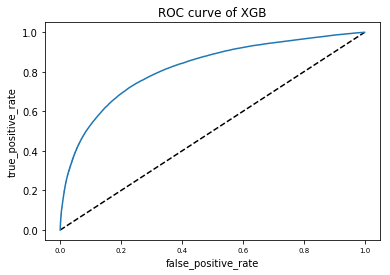

In [234]:
model_evaluation.model_evaluation_test(X_app_2018_r_feats, y_app_2018, xgb, 'XGB', feat_imp= True)

cross_val_score [0.78649023 0.78725367 0.78839884 0.78969971 0.78834775]
accuracy 78.58151696759171
balanced_accuracy_score 70.54493276135159
f1_score 72.08144193481462
precision_score 77.66795385404274
Log loss 7.3977334455399175
recall_score 50.30707863745726


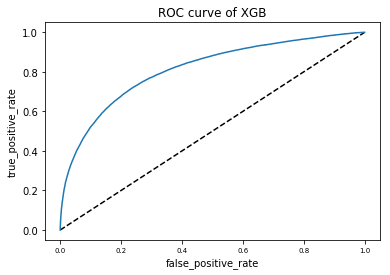

roc_auc_score 81.17301195947691
confusion_matrix [[66453  6747]
 [15697 15891]]
classification_report              precision    recall  f1-score   support

           0       0.81      0.91      0.86     73200
           1       0.70      0.50      0.59     31588

   micro avg       0.79      0.79      0.79    104788
   macro avg       0.76      0.71      0.72    104788
weighted avg       0.78      0.79      0.77    104788


 Time taken to execute the XGB is 29.66370701789856

Dated on2019-01-22 06:26:38.953484



In [247]:
xgb= mlModels.xgb(X_train, y_train, X_test, y_test, max_depth=7, learning_rate=0.1, n_estimators=220, booster='gbtree')

Provided model : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=0, n_estimators=220,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
accuracy  80.52219885928051
f1_score  74.65155114464493
precision_score  79.84755240043214
recall_score  54.010797280527775
confusion_matrix 
 [[202209  17871]
 [ 43360  50923]]
roc_auc_score 84.91207151308114


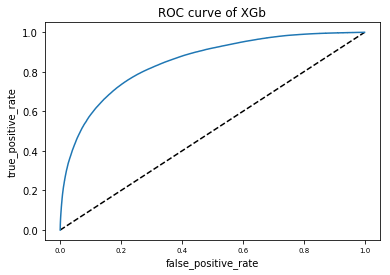

In [248]:
model_evaluation.model_evaluation_test(X_train, y_train, xgb, 'XGb')

Provided model : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=0, n_estimators=220,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
accuracy  90.9699430898844
f1_score  51.7017442093782
precision_score  98.81075481444745
recall_score  50.421597278781206
confusion_matrix 
 [[4757301  453622]
 [  20697   21049]]
no_new_purchase_vehicle 0.0077960044
no_owned_vehicle 0.013426452
no_ro_visits_24_36mo 0.010123978
no_ro_visits_12_18mo 0.009149478
log_avg_no_repairs_under_warranty 0.032808185
new_vehicle_purchase_value 0.058740728
total_vehicle_purchase_value 0.047425695
no_days_since_lastro_recent 0.06675329
no_ro_visits_0_6mo 0.008174977
est_current_mileage 0.060960423
wpro_visits_ratio 0.04060419
no_ro_visits_48_60mo 0.00

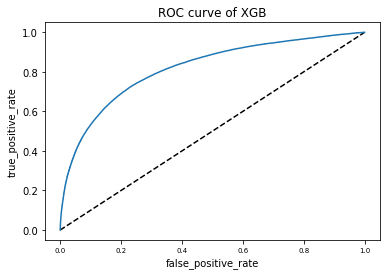

In [249]:
model_evaluation.model_evaluation_test(X_app_2018_r_feats, y_app_2018, xgb, 'XGB', feat_imp= True)

cross_val_score [0.78594945 0.78688785 0.78684014 0.78871358 0.78869767]
accuracy 78.56147650494331
balanced_accuracy_score 70.42800908002
f1_score 71.98556453752066
precision_score 77.6468794354862
Log loss 7.404654466474873
recall_score 49.94618209446625


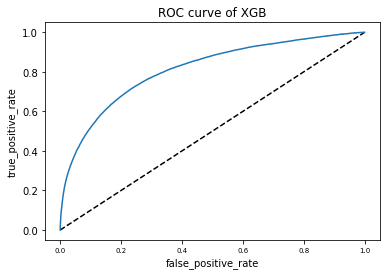

roc_auc_score 81.17157845875622
confusion_matrix [[66546  6654]
 [15811 15777]]
classification_report              precision    recall  f1-score   support

           0       0.81      0.91      0.86     73200
           1       0.70      0.50      0.58     31588

   micro avg       0.79      0.79      0.79    104788
   macro avg       0.76      0.70      0.72    104788
weighted avg       0.78      0.79      0.77    104788


 Time taken to execute the XGB is 41.965686082839966

Dated on2019-01-22 06:30:41.086240



In [250]:
xgb= mlModels.xgb(X_train, y_train, X_test, y_test, max_depth=7, learning_rate=0.05, n_estimators=300, booster='gbtree')

Provided model : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=0, n_estimators=300,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
accuracy  80.01386931668168
f1_score  73.94008945973724
precision_score  79.2758808556258
recall_score  52.90879585927474
confusion_matrix 
 [[201650  18430]
 [ 44399  49884]]
roc_auc_score 84.01572752983061


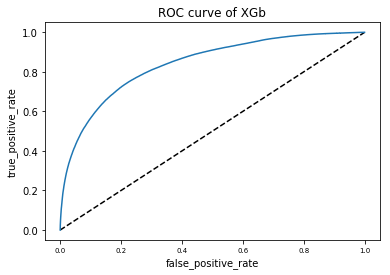

In [251]:
model_evaluation.model_evaluation_test(X_train, y_train, xgb, 'XGb')

Provided model : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=0, n_estimators=300,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
accuracy  90.91665589436532
f1_score  51.66968010994651
precision_score  98.81087125999386
recall_score  50.48387869496479
confusion_matrix 
 [[4754476  456447]
 [  20671   21075]]
no_new_purchase_vehicle 0.008713441
no_owned_vehicle 0.016025156
no_ro_visits_24_36mo 0.011706319
no_ro_visits_12_18mo 0.010228823
log_avg_no_repairs_under_warranty 0.032353386
new_vehicle_purchase_value 0.060350053
total_vehicle_purchase_value 0.05027277
no_days_since_lastro_recent 0.06500985
no_ro_visits_0_6mo 0.008220943
est_current_mileage 0.060956206
wpro_visits_ratio 0.04091529
no_ro_visits_48_60mo 0.00

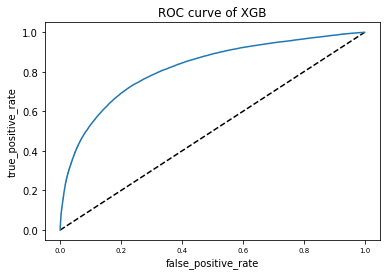

In [252]:
model_evaluation.model_evaluation_test(X_app_2018_r_feats, y_app_2018, xgb, 'XGB', feat_imp= True)

In [253]:
y_2017.value_counts()

0    5026514
1      44441
Name: dep_purchase_lexus_new_luv_6mo, dtype: int64

In [261]:
from imblearn.under_sampling import RandomUnderSampler

In [262]:
rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X_encoded_r_selected, y)
X_rus= pd.DataFrame(X_rus, columns=X_encoded_r_selected.columns)
y_rus= pd.Series(y_rus, name=y.name)

In [263]:
y.value_counts()

0    293280
1    125871
Name: dep_purchase_lexus_new_luv_6mo, dtype: int64

In [264]:
y_rus.value_counts()

1    125871
0    125871
Name: dep_purchase_lexus_new_luv_6mo, dtype: int64

In [265]:
X_train, X_test,y_train, y_test= data_split.train_test_split(X_rus, y_rus)

cross_val_score [0.7396854  0.73944706 0.7372226  0.74165784 0.73940678]
accuracy 74.0943180373713
balanced_accuracy_score 74.09711893473265
f1_score 74.08542309888209
precision_score 74.13424026701773
Log loss 8.947601158537063
recall_score 72.13848253101894


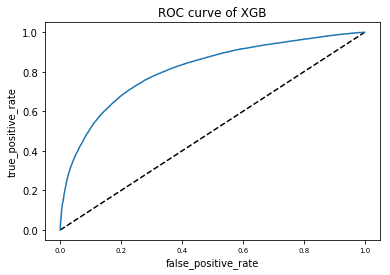

roc_auc_score 81.04052488761788
confusion_matrix [[23899  7524]
 [ 8780 22733]]
classification_report              precision    recall  f1-score   support

           0       0.73      0.76      0.75     31423
           1       0.75      0.72      0.74     31513

   micro avg       0.74      0.74      0.74     62936
   macro avg       0.74      0.74      0.74     62936
weighted avg       0.74      0.74      0.74     62936


 Time taken to execute the XGB is 15.29943561553955

Dated on2019-01-22 07:25:42.316436



In [278]:
xgb= mlModels.xgb(X_train, y_train, X_test, y_test, max_depth=7, learning_rate=0.1, n_estimators=200, booster='gbtree')

Provided model : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=0, n_estimators=200,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
accuracy  77.05263603910892
f1_score  77.04519214969122
precision_score  77.08555191658853
recall_score  75.28773394942665
confusion_matrix 
 [[74440 20008]
 [23318 71040]]
roc_auc_score 85.20229924899687


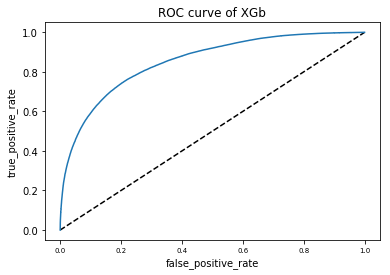

In [279]:
model_evaluation.model_evaluation_test(X_train, y_train, xgb, 'XGb')

Provided model : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=0, n_estimators=200,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
accuracy  76.79181764546748
f1_score  45.75035616012872
precision_score  98.93818758963431
recall_score  72.23207013845638
confusion_matrix 
 [[4003466 1207457]
 [  11592   30154]]
no_new_purchase_vehicle 0.008208956
no_owned_vehicle 0.012686567
no_ro_visits_24_36mo 0.011131841
no_ro_visits_12_18mo 0.009701492
log_avg_no_repairs_under_warranty 0.031094527
new_vehicle_purchase_value 0.059079602
total_vehicle_purchase_value 0.05068408
no_days_since_lastro_recent 0.07170398
no_ro_visits_0_6mo 0.0073383083
est_current_mileage 0.06579602
wpro_visits_ratio 0.038432837
no_ro_visits_48_60mo 0.00

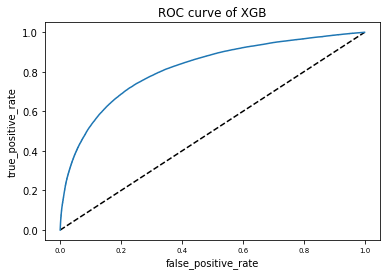

In [280]:
model_evaluation.model_evaluation_test(X_app_2018_r_feats, y_app_2018, xgb, 'XGB', feat_imp= True)

In [287]:
gc.collect()

0

cross_val_score [0.73862613 0.73695779 0.73518352 0.74025424 0.73869174]
accuracy 74.08637345875175
balanced_accuracy_score 74.08843133291703
f1_score 74.08176738348186
precision_score 74.10847742370886
Log loss 8.95034722780025
recall_score 72.6493827944023


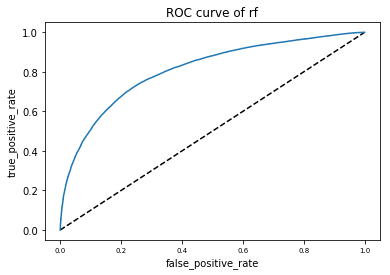

roc_auc_score 80.96834369382594
confusion_matrix [[23733  7690]
 [ 8619 22894]]
classification_report              precision    recall  f1-score   support

           0       0.73      0.76      0.74     31423
           1       0.75      0.73      0.74     31513

   micro avg       0.74      0.74      0.74     62936
   macro avg       0.74      0.74      0.74     62936
weighted avg       0.74      0.74      0.74     62936


 Time taken to execute the rf is 4.465167999267578

Dated on2019-01-23 00:32:24.888164



In [291]:
rf= mlModels.rf(X_train, y_train, X_test, y_test, n_estimators=250, min_samples_split=40)

Provided model : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=60,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
accuracy  77.29203521074542
f1_score  77.2871676005659
precision_score  77.31364365728325
recall_score  75.86426164183217
confusion_matrix 
 [[74348 20100]
 [22774 71584]]
roc_auc_score 86.15181779127627


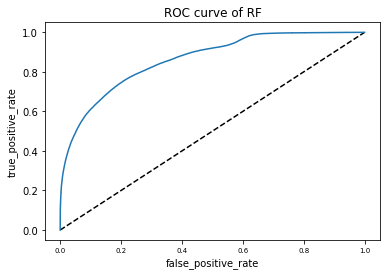

In [292]:
model_evaluation.model_evaluation_test(X_train, y_train, rf, 'RF')

Provided model : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=60,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
accuracy  76.0804269220086
f1_score  45.46079096251491
precision_score  98.93762076652209
recall_score  72.4859866813587
confusion_matrix 
 [[3965993 1244930]
 [  11486   30260]]
no_new_purchase_vehicle 0.10314665777750792
no_owned_vehicle 0.01436918471042383
no_ro_visits_24_36mo 0.019208640808640872
no_ro_visits_12_18mo 0.018703329434057146
log_avg_no_repairs_under_warranty 0.03278743594639681
new_vehicle_purchase_value 0.043688398088392755
total_vehicle_purchase_value 0.027317409619746946
no_days_since_lastro_recent 0.03513017178466428
no_ro_visits_0_6mo 0.00981

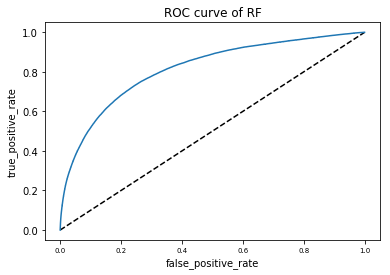

In [293]:
model_evaluation.model_evaluation_test(X_app_2018_r_feats, y_app_2018, rf, 'RF', feat_imp= True)

### Grid Search 

#### RFC

In [296]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [300]:
clf = GridSearchCV(RandomForestClassifier(), param_grid={'criterion':['gini', 'entropy'], 'max_depth':[5,6,7,8,9],
                                      "max_leaf_nodes":[5,6,8,9],'min_samples_split':[30,40,50,60],
                                     'n_estimators':[50,75,100,125,150]}, cv=3, scoring= 'f1', verbose=3)



In [301]:
clf.fit(X_train, y_train) # Started at 1PM

Fitting 3 folds for each of 800 candidates, totalling 2400 fits
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=30, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=30, n_estimators=50, score=0.7285378525482433, total=   3.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=30, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=30, n_estimators=50, score=0.7221685640546575, total=   3.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=30, n_estimators=50 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=30, n_estimators=50, score=0.7272358611223757, total=   3.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=30, n_estimators=75 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=30, n_estimators=75, score=0.725807467103192, total=   5.2s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=30, n_estimators=75 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=30, n_estimators=75, score=0.7248018830914084, total=   5.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=30, n_estimators=75 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=30, n_estimators=75, score=0.7240026574709733, total=   5.2s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=30, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=30, n_estimators=100, score=0.7260556

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=50, n_estimators=125, score=0.7273070331294518, total=   8.7s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=50, n_estimators=125 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=50, n_estimators=125, score=0.7257287268275071, total=   8.6s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=50, n_estimators=125 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=50, n_estimators=125, score=0.7268438974102652, total=   9.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=50, n_estimators=150, score=0.7269331575560682, total=  10.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=50, n_estimators=150, score=0

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=6, min_samples_split=40, n_estimators=50, score=0.7259750829524823, total=   3.8s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=6, min_samples_split=40, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=6, min_samples_split=40, n_estimators=50, score=0.7255290381410557, total=   3.7s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=6, min_samples_split=40, n_estimators=75 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=6, min_samples_split=40, n_estimators=75, score=0.7263220700916969, total=   5.7s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=6, min_samples_split=40, n_estimators=75 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=6, min_samples_split=40, n_estimators=75, score=0.7236621412070003, total=   5.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=6, min_samples_split=40, n_estimators=75 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=6, min_samples_split=40, n_estimators=75, score=0.72598122

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=6, min_samples_split=60, n_estimators=100, score=0.7261608296819341, total=   7.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=6, min_samples_split=60, n_estimators=125 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=6, min_samples_split=60, n_estimators=125, score=0.7255684776948446, total=   9.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=6, min_samples_split=60, n_estimators=125 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=6, min_samples_split=60, n_estimators=125, score=0.7249275544916215, total=   9.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=6, min_samples_split=60, n_estimators=125 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=6, min_samples_split=60, n_estimators=125, score=0.7260991699018402, total=   9.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=6, min_samples_split=60, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=6, min_samples_split=60, n_estimators=150, score=0

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=8, min_samples_split=50, n_estimators=50, score=0.7264723979615986, total=   4.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=8, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=8, min_samples_split=50, n_estimators=50, score=0.7231449662721141, total=   4.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=8, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=8, min_samples_split=50, n_estimators=50, score=0.7266221073207642, total=   4.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=8, min_samples_split=50, n_estimators=75 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=8, min_samples_split=50, n_estimators=75, score=0.7278904109589042, total=   6.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=8, min_samples_split=50, n_estimators=75 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=8, min_samples_split=50, n_estimators=75, score=0.72460525

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=9, min_samples_split=30, n_estimators=100, score=0.7241379310344827, total=   8.6s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=9, min_samples_split=30, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=9, min_samples_split=30, n_estimators=100, score=0.7248920771965465, total=   8.7s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=9, min_samples_split=30, n_estimators=125 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=9, min_samples_split=30, n_estimators=125, score=0.7259172865968982, total=  10.7s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=9, min_samples_split=30, n_estimators=125 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=9, min_samples_split=30, n_estimators=125, score=0.7263506063947079, total=  11.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=9, min_samples_split=30, n_estimators=125 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=9, min_samples_split=30, n_estimators=125, score=0

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=9, min_samples_split=50, n_estimators=150, score=0.7278087024696198, total=  13.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=9, min_samples_split=60, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=9, min_samples_split=60, n_estimators=50, score=0.7283656856606137, total=   4.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=9, min_samples_split=60, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=9, min_samples_split=60, n_estimators=50, score=0.7242216824906161, total=   4.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=9, min_samples_split=60, n_estimators=50 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=9, min_samples_split=60, n_estimators=50, score=0.7254147479972245, total=   4.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=9, min_samples_split=60, n_estimators=75 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=9, min_samples_split=60, n_estimators=75, score=0.7252220

[CV]  criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=40, n_estimators=100, score=0.7287166257420817, total=   7.2s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=40, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=40, n_estimators=100, score=0.7248043744696899, total=   7.0s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=40, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=40, n_estimators=100, score=0.7250039538193894, total=   7.3s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=40, n_estimators=125 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=40, n_estimators=125, score=0.7279176237128706, total=   9.1s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=40, n_estimators=125 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=40, n_estimators=125, score=0

[CV]  criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=60, n_estimators=150, score=0.7243427704752274, total=  10.7s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=60, n_estimators=150 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=60, n_estimators=150, score=0.7257863421870809, total=  10.8s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=6, min_samples_split=30, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=6, min_samples_split=30, n_estimators=50, score=0.7230346765438406, total=   3.9s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=6, min_samples_split=30, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=6, min_samples_split=30, n_estimators=50, score=0.7247214845775523, total=   3.8s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=6, min_samples_split=30, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=6, min_samples_split=30, n_estimators=50, score=0.72880

[CV]  criterion=gini, max_depth=6, max_leaf_nodes=6, min_samples_split=50, n_estimators=75, score=0.7288328626924816, total=   5.7s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=6, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=6, min_samples_split=50, n_estimators=100, score=0.7257300275482095, total=   7.6s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=6, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=6, min_samples_split=50, n_estimators=100, score=0.726061250664748, total=   7.7s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=6, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=6, min_samples_split=50, n_estimators=100, score=0.7263281801773523, total=   7.6s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=6, min_samples_split=50, n_estimators=125 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=6, min_samples_split=50, n_estimators=125, score=0.7

[CV]  criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_split=30, n_estimators=150, score=0.7268181460806666, total=  12.6s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_split=30, n_estimators=150 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_split=30, n_estimators=150, score=0.7250964642885266, total=  12.3s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_split=30, n_estimators=150 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_split=30, n_estimators=150, score=0.7271726999795658, total=  12.5s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_split=40, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_split=40, n_estimators=50, score=0.7259385235575712, total=   4.2s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_split=40, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_split=40, n_estimators=50, score=0.726

[CV]  criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_split=60, n_estimators=75, score=0.7240406856998004, total=   6.2s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_split=60, n_estimators=75 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_split=60, n_estimators=75, score=0.7256495292582871, total=   6.2s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_split=60, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_split=60, n_estimators=100, score=0.7255217707050614, total=   8.4s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_split=60, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_split=60, n_estimators=100, score=0.7239605590111264, total=   8.1s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_split=60, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=8, min_samples_split=60, n_estimators=100, score=0.72

[CV]  criterion=gini, max_depth=6, max_leaf_nodes=9, min_samples_split=40, n_estimators=125, score=0.72761000455896, total=  10.5s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=9, min_samples_split=40, n_estimators=150 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=9, min_samples_split=40, n_estimators=150, score=0.7265380563809883, total=  12.8s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=9, min_samples_split=40, n_estimators=150 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=9, min_samples_split=40, n_estimators=150, score=0.7253588818329368, total=  13.2s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=9, min_samples_split=40, n_estimators=150 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=9, min_samples_split=40, n_estimators=150, score=0.7270750614482889, total=  12.8s
[CV] criterion=gini, max_depth=6, max_leaf_nodes=9, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_leaf_nodes=9, min_samples_split=50, n_estimators=50, score=0.725

[CV]  criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=30, n_estimators=75, score=0.7259703743265108, total=   5.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=30, n_estimators=75 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=30, n_estimators=75, score=0.7255419916532503, total=   5.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=30, n_estimators=75 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=30, n_estimators=75, score=0.7231473705892606, total=   5.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=30, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=30, n_estimators=100, score=0.7262469748876386, total=   7.2s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=30, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=30, n_estimators=100, score=0.7253

[CV]  criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=50, n_estimators=125, score=0.723583545847655, total=   8.8s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=50, n_estimators=125 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=50, n_estimators=125, score=0.7256229386608595, total=   9.1s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=50, n_estimators=150, score=0.7267133394028821, total=  10.6s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=50, n_estimators=150, score=0.7254136281659217, total=  10.4s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=50, n_estimators=150, score=0.

[CV]  criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=40, n_estimators=50, score=0.7240536853126884, total=   3.8s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=40, n_estimators=75 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=40, n_estimators=75, score=0.7280368721193656, total=   5.5s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=40, n_estimators=75 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=40, n_estimators=75, score=0.7254533496194683, total=   5.8s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=40, n_estimators=75 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=40, n_estimators=75, score=0.7248489832063, total=   5.8s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=40, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=40, n_estimators=100, score=0.725785526

[CV]  criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=60, n_estimators=125, score=0.7279056639277426, total=   9.2s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=60, n_estimators=125 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=60, n_estimators=125, score=0.724056790006475, total=   9.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=60, n_estimators=125 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=60, n_estimators=125, score=0.7262689674753147, total=   9.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=60, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=60, n_estimators=150, score=0.7273723256068739, total=  11.1s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=60, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=60, n_estimators=150, score=0.

[CV]  criterion=gini, max_depth=7, max_leaf_nodes=8, min_samples_split=50, n_estimators=50, score=0.7248950851107303, total=   4.1s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=8, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=8, min_samples_split=50, n_estimators=50, score=0.7265767752504567, total=   4.1s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=8, min_samples_split=50, n_estimators=75 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=8, min_samples_split=50, n_estimators=75, score=0.7275545673754423, total=   6.2s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=8, min_samples_split=50, n_estimators=75 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=8, min_samples_split=50, n_estimators=75, score=0.72387834989461, total=   6.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=8, min_samples_split=50, n_estimators=75 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=8, min_samples_split=50, n_estimators=75, score=0.7276709585

[CV]  criterion=gini, max_depth=7, max_leaf_nodes=9, min_samples_split=30, n_estimators=100, score=0.725624655158824, total=   8.5s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=9, min_samples_split=30, n_estimators=125 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=9, min_samples_split=30, n_estimators=125, score=0.7274418604651164, total=  10.7s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=9, min_samples_split=30, n_estimators=125 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=9, min_samples_split=30, n_estimators=125, score=0.7250102773297916, total=  10.6s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=9, min_samples_split=30, n_estimators=125 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=9, min_samples_split=30, n_estimators=125, score=0.7257387973471359, total=  10.6s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=9, min_samples_split=30, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=9, min_samples_split=30, n_estimators=150, score=0.

[CV]  criterion=gini, max_depth=7, max_leaf_nodes=9, min_samples_split=60, n_estimators=50, score=0.7238475809904382, total=   4.2s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=9, min_samples_split=60, n_estimators=50 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=9, min_samples_split=60, n_estimators=50, score=0.7225964677591451, total=   4.1s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=9, min_samples_split=60, n_estimators=50 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=9, min_samples_split=60, n_estimators=50, score=0.7296454700694021, total=   4.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=9, min_samples_split=60, n_estimators=75 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=9, min_samples_split=60, n_estimators=75, score=0.7277339346110484, total=   6.3s
[CV] criterion=gini, max_depth=7, max_leaf_nodes=9, min_samples_split=60, n_estimators=75 
[CV]  criterion=gini, max_depth=7, max_leaf_nodes=9, min_samples_split=60, n_estimators=75, score=0.72426493

[CV]  criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=40, n_estimators=100, score=0.7253664177005531, total=   6.8s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=40, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=40, n_estimators=100, score=0.7280452372770159, total=   7.0s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=40, n_estimators=125 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=40, n_estimators=125, score=0.7244380558232107, total=   8.7s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=40, n_estimators=125 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=40, n_estimators=125, score=0.7249083445617772, total=   8.8s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=40, n_estimators=125 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=40, n_estimators=125, score=0

[CV]  criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=60, n_estimators=150, score=0.7271617688479954, total=  10.6s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=6, min_samples_split=30, n_estimators=50 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=6, min_samples_split=30, n_estimators=50, score=0.7270875125376128, total=   3.8s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=6, min_samples_split=30, n_estimators=50 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=6, min_samples_split=30, n_estimators=50, score=0.7258833866817297, total=   3.8s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=6, min_samples_split=30, n_estimators=50 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=6, min_samples_split=30, n_estimators=50, score=0.7255375961827116, total=   3.8s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=6, min_samples_split=30, n_estimators=75 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=6, min_samples_split=30, n_estimators=75, score=0.7253205

[CV]  criterion=gini, max_depth=8, max_leaf_nodes=6, min_samples_split=50, n_estimators=100, score=0.7253915429869251, total=   7.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=6, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=6, min_samples_split=50, n_estimators=100, score=0.7240313012747697, total=   7.6s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=6, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=6, min_samples_split=50, n_estimators=100, score=0.7245853905557667, total=   7.4s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=6, min_samples_split=50, n_estimators=125 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=6, min_samples_split=50, n_estimators=125, score=0.7267883726396615, total=   9.3s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=6, min_samples_split=50, n_estimators=125 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=6, min_samples_split=50, n_estimators=125, score=0

[CV]  criterion=gini, max_depth=8, max_leaf_nodes=8, min_samples_split=30, n_estimators=150, score=0.7245408486383786, total=  12.3s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=8, min_samples_split=30, n_estimators=150 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=8, min_samples_split=30, n_estimators=150, score=0.7275555415894166, total=  12.5s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=8, min_samples_split=40, n_estimators=50 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=8, min_samples_split=40, n_estimators=50, score=0.7253523357086302, total=   4.1s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=8, min_samples_split=40, n_estimators=50 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=8, min_samples_split=40, n_estimators=50, score=0.7217814669965681, total=   4.2s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=8, min_samples_split=40, n_estimators=50 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=8, min_samples_split=40, n_estimators=50, score=0.72626

[CV]  criterion=gini, max_depth=8, max_leaf_nodes=8, min_samples_split=60, n_estimators=75, score=0.7260838663823738, total=   6.3s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=8, min_samples_split=60, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=8, min_samples_split=60, n_estimators=100, score=0.7255753708120745, total=   8.2s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=8, min_samples_split=60, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=8, min_samples_split=60, n_estimators=100, score=0.7241352014565027, total=   8.1s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=8, min_samples_split=60, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=8, min_samples_split=60, n_estimators=100, score=0.728035043804756, total=   8.2s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=8, min_samples_split=60, n_estimators=125 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=8, min_samples_split=60, n_estimators=125, score=0.7

[CV]  criterion=gini, max_depth=8, max_leaf_nodes=9, min_samples_split=40, n_estimators=150, score=0.7270240528218834, total=  12.8s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=9, min_samples_split=40, n_estimators=150 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=9, min_samples_split=40, n_estimators=150, score=0.7256206444272372, total=  12.9s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=9, min_samples_split=40, n_estimators=150 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=9, min_samples_split=40, n_estimators=150, score=0.7259640427446215, total=  12.6s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=9, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=9, min_samples_split=50, n_estimators=50, score=0.7272413034597619, total=   4.3s
[CV] criterion=gini, max_depth=8, max_leaf_nodes=9, min_samples_split=50, n_estimators=50 
[CV]  criterion=gini, max_depth=8, max_leaf_nodes=9, min_samples_split=50, n_estimators=50, score=0.725

[CV]  criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=30, n_estimators=75, score=0.7261486316846598, total=   5.1s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=30, n_estimators=75 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=30, n_estimators=75, score=0.7268987391461366, total=   5.2s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=30, n_estimators=100 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=30, n_estimators=100, score=0.7258008630736763, total=   7.2s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=30, n_estimators=100 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=30, n_estimators=100, score=0.7245774714380134, total=   7.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=30, n_estimators=100 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=30, n_estimators=100, score=0.72

[CV]  criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=50, n_estimators=125, score=0.7262265960289888, total=   8.8s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=50, n_estimators=150, score=0.7269935766880777, total=  10.7s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=50, n_estimators=150, score=0.7237335612210987, total=  10.6s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=50, n_estimators=150 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=50, n_estimators=150, score=0.7279427839720166, total=  10.6s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=60, n_estimators=50 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=60, n_estimators=50, score=0.7

[CV]  criterion=gini, max_depth=9, max_leaf_nodes=6, min_samples_split=40, n_estimators=75, score=0.7282834434190596, total=   5.9s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=6, min_samples_split=40, n_estimators=75 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=6, min_samples_split=40, n_estimators=75, score=0.7244077100223981, total=   5.6s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=6, min_samples_split=40, n_estimators=75 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=6, min_samples_split=40, n_estimators=75, score=0.7283632444590226, total=   5.6s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=6, min_samples_split=40, n_estimators=100 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=6, min_samples_split=40, n_estimators=100, score=0.7265191628845183, total=   7.6s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=6, min_samples_split=40, n_estimators=100 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=6, min_samples_split=40, n_estimators=100, score=0.7238

[CV]  criterion=gini, max_depth=9, max_leaf_nodes=6, min_samples_split=60, n_estimators=125, score=0.7259387003213923, total=   9.6s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=6, min_samples_split=60, n_estimators=125 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=6, min_samples_split=60, n_estimators=125, score=0.7243859927111392, total=   9.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=6, min_samples_split=60, n_estimators=150 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=6, min_samples_split=60, n_estimators=150, score=0.7262450543239339, total=  11.1s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=6, min_samples_split=60, n_estimators=150 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=6, min_samples_split=60, n_estimators=150, score=0.7251161691738206, total=  11.5s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=6, min_samples_split=60, n_estimators=150 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=6, min_samples_split=60, n_estimators=150, score=0

[CV]  criterion=gini, max_depth=9, max_leaf_nodes=8, min_samples_split=50, n_estimators=50, score=0.728625692757955, total=   4.1s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=8, min_samples_split=50, n_estimators=75 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=8, min_samples_split=50, n_estimators=75, score=0.7254719510464145, total=   6.2s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=8, min_samples_split=50, n_estimators=75 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=8, min_samples_split=50, n_estimators=75, score=0.7260226666248077, total=   6.1s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=8, min_samples_split=50, n_estimators=75 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=8, min_samples_split=50, n_estimators=75, score=0.7254280078895464, total=   6.1s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=8, min_samples_split=50, n_estimators=100 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=8, min_samples_split=50, n_estimators=100, score=0.7269494

[CV]  criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=30, n_estimators=125, score=0.7236113974027621, total=  10.7s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=30, n_estimators=125 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=30, n_estimators=125, score=0.7266716801403773, total=  10.8s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=30, n_estimators=125 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=30, n_estimators=125, score=0.7249749948402051, total=  10.7s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=30, n_estimators=150 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=30, n_estimators=150, score=0.7231751795753899, total=  13.0s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=30, n_estimators=150 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=30, n_estimators=150, score=0

[CV]  criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=60, n_estimators=50, score=0.726158403050212, total=   4.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=60, n_estimators=50 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=60, n_estimators=50, score=0.7234157675292021, total=   4.3s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=60, n_estimators=75 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=60, n_estimators=75, score=0.7255531480807857, total=   6.4s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=60, n_estimators=75 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=60, n_estimators=75, score=0.7247551075311357, total=   6.5s
[CV] criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=60, n_estimators=75 
[CV]  criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=60, n_estimators=75, score=0.728599617

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=40, n_estimators=100, score=0.7173776612007788, total=   9.5s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=40, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=40, n_estimators=100, score=0.7283973758200561, total=   9.5s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=40, n_estimators=125, score=0.7262153623689545, total=  12.3s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=40, n_estimators=125, score=0.7256112774451098, total=  11.6s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=40

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=60, n_estimators=150, score=0.7250612860644917, total=  14.2s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=60, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=60, n_estimators=150, score=0.7267074923451854, total=  14.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=6, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=6, min_samples_split=30, n_estimators=50, score=0.7271990903001697, total=   5.3s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=6, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=6, min_samples_split=30, n_estimators=50, score=0.7245923891598403, total=   5.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=6, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=6, min_samples_split=30, n_e

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=6, min_samples_split=50, n_estimators=75, score=0.7256667930729365, total=   7.4s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=6, min_samples_split=50, n_estimators=75 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=6, min_samples_split=50, n_estimators=75, score=0.723121653612113, total=   7.7s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=6, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=6, min_samples_split=50, n_estimators=100, score=0.7273410232732851, total=  10.3s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=6, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=6, min_samples_split=50, n_estimators=100, score=0.7250271743411206, total=  10.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=6, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=6, min_samples_split=50, n_

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=30, n_estimators=125, score=0.7244552670693527, total=  14.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=30, n_estimators=125 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=30, n_estimators=125, score=0.726672742700902, total=  13.8s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=30, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=30, n_estimators=150, score=0.7264338956453511, total=  16.5s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=30, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=30, n_estimators=150, score=0.7248750869647714, total=  17.2s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=30, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=30,

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=60, n_estimators=50, score=0.723404255319149, total=   5.5s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=60, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=60, n_estimators=50, score=0.7241795213610106, total=   5.7s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=60, n_estimators=75 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=60, n_estimators=75, score=0.7278490945042528, total=   8.5s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=60, n_estimators=75 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=60, n_estimators=75, score=0.7268339314538247, total=   8.8s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=60, n_estimators=75 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=60, n_estim

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=9, min_samples_split=40, n_estimators=100, score=0.725839443622746, total=  11.8s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=9, min_samples_split=40, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=9, min_samples_split=40, n_estimators=100, score=0.7251658250091026, total=  11.7s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=9, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=9, min_samples_split=40, n_estimators=125, score=0.7279317563978377, total=  14.5s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=9, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=9, min_samples_split=40, n_estimators=125, score=0.7264466837496658, total=  14.5s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=9, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=9, min_samples_split=40,

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=9, min_samples_split=60, n_estimators=150, score=0.7248970316716375, total=  17.6s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=9, min_samples_split=60, n_estimators=150 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=9, min_samples_split=60, n_estimators=150, score=0.7277817095226863, total=  17.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=30, n_estimators=50, score=0.7300415606972273, total=   4.9s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=30, n_estimators=50, score=0.7255786275799432, total=   5.3s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=30, n_e

[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=50, n_estimators=75, score=0.7246194093358969, total=   7.3s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=50, n_estimators=75 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=50, n_estimators=75, score=0.7247630819942315, total=   7.2s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=50, n_estimators=100, score=0.726133895691039, total=   9.7s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=50, n_estimators=100, score=0.722944956161175, total=   9.5s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=50, n_e

[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=6, min_samples_split=30, n_estimators=125, score=0.7257635082223961, total=  12.3s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=6, min_samples_split=30, n_estimators=125 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=6, min_samples_split=30, n_estimators=125, score=0.7256396899812158, total=  12.8s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=6, min_samples_split=30, n_estimators=150 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=6, min_samples_split=30, n_estimators=150, score=0.7288127676138575, total=  14.9s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=6, min_samples_split=30, n_estimators=150 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=6, min_samples_split=30, n_estimators=150, score=0.725484043053943, total=  14.8s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=6, min_samples_split=30, n_estimators=150 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=6, min_samples_split=30,

[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=6, min_samples_split=60, n_estimators=50, score=0.7255508673230192, total=   4.9s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=6, min_samples_split=60, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=6, min_samples_split=60, n_estimators=50, score=0.7262881161154228, total=   5.1s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=6, min_samples_split=60, n_estimators=75 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=6, min_samples_split=60, n_estimators=75, score=0.7253856588535916, total=   7.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=6, min_samples_split=60, n_estimators=75 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=6, min_samples_split=60, n_estimators=75, score=0.7271710076459253, total=   7.6s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=6, min_samples_split=60, n_estimators=75 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=6, min_samples_split=60, n_esti

[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_split=40, n_estimators=100, score=0.7257325502668828, total=  11.2s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_split=40, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_split=40, n_estimators=100, score=0.7250679820400936, total=  11.3s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_split=40, n_estimators=125, score=0.7279204067541272, total=  14.1s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_split=40, n_estimators=125, score=0.7257841473379849, total=  14.2s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_split=40

[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_split=60, n_estimators=150, score=0.7255674653215637, total=  16.4s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_split=60, n_estimators=150 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=8, min_samples_split=60, n_estimators=150, score=0.7279949756633696, total=  17.0s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=30, n_estimators=50, score=0.7262097981437419, total=   5.9s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=30, n_estimators=50, score=0.7247292133767012, total=   5.8s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=30, n_e

[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=50, n_estimators=75, score=0.724175667316934, total=   8.8s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=50, n_estimators=75 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=50, n_estimators=75, score=0.7252259394323768, total=   9.0s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=50, n_estimators=100, score=0.7258960121150935, total=  12.0s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=50, n_estimators=100, score=0.7261130526084846, total=  12.1s
[CV] criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=50, n_

[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=30, n_estimators=125, score=0.7261997933819617, total=  11.9s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=30, n_estimators=125 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=30, n_estimators=125, score=0.7266148737547773, total=  12.2s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=30, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=30, n_estimators=150, score=0.7267994354712247, total=  14.0s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=30, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=30, n_estimators=150, score=0.7240236163293657, total=  14.6s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=30, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=30

[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=60, n_estimators=50, score=0.7260551315994395, total=   4.7s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=60, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=60, n_estimators=50, score=0.7256773061314028, total=   4.9s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=60, n_estimators=75 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=60, n_estimators=75, score=0.727544630339284, total=   7.1s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=60, n_estimators=75 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=60, n_estimators=75, score=0.7256918238993711, total=   7.1s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=60, n_estimators=75 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=60, n_estim

[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=6, min_samples_split=40, n_estimators=100, score=0.7267126393645136, total=  10.8s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=6, min_samples_split=40, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=6, min_samples_split=40, n_estimators=100, score=0.7244954491491888, total=  10.5s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=6, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=6, min_samples_split=40, n_estimators=125, score=0.7266401278876594, total=  12.7s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=6, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=6, min_samples_split=40, n_estimators=125, score=0.725532281564806, total=  12.8s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=6, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=6, min_samples_split=40,

[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=6, min_samples_split=60, n_estimators=150, score=0.7249878104405543, total=  15.9s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=6, min_samples_split=60, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=6, min_samples_split=60, n_estimators=150, score=0.7255400053645529, total=  16.0s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=8, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=8, min_samples_split=30, n_estimators=50, score=0.7271674491392801, total=   5.6s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=8, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=8, min_samples_split=30, n_estimators=50, score=0.7289123843582368, total=   6.0s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=8, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=8, min_samples_split=30, n_e

[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=8, min_samples_split=50, n_estimators=75, score=0.726003818107846, total=   9.1s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=8, min_samples_split=50, n_estimators=75 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=8, min_samples_split=50, n_estimators=75, score=0.7249204262933696, total=   8.9s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=8, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=8, min_samples_split=50, n_estimators=100, score=0.7272870290254071, total=  11.9s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=8, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=8, min_samples_split=50, n_estimators=100, score=0.7246116236889836, total=  11.6s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=8, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=8, min_samples_split=50, n_

[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=30, n_estimators=125, score=0.7256172354143734, total=  15.3s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=30, n_estimators=125 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=30, n_estimators=125, score=0.7280089141386399, total=  15.4s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=30, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=30, n_estimators=150, score=0.7272727272727273, total=  17.7s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=30, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=30, n_estimators=150, score=0.7248875207198674, total=  18.6s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=30, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=30

[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=60, n_estimators=50, score=0.7244365774251668, total=   6.0s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=60, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=60, n_estimators=50, score=0.7273928223193785, total=   6.0s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=60, n_estimators=75 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=60, n_estimators=75, score=0.7274783619484457, total=   8.9s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=60, n_estimators=75 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=60, n_estimators=75, score=0.7254115193832738, total=   9.0s
[CV] criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=60, n_estimators=75 
[CV]  criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=60, n_esti

[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=5, min_samples_split=40, n_estimators=100, score=0.7237854490876058, total=  10.1s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=5, min_samples_split=40, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=5, min_samples_split=40, n_estimators=100, score=0.7272042909569963, total=  10.0s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=5, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=5, min_samples_split=40, n_estimators=125, score=0.7264924902183517, total=  12.5s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=5, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=5, min_samples_split=40, n_estimators=125, score=0.7245879445240306, total=  12.8s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=5, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=5, min_samples_split=40

[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=5, min_samples_split=60, n_estimators=150, score=0.7246860344339177, total=  15.6s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=5, min_samples_split=60, n_estimators=150 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=5, min_samples_split=60, n_estimators=150, score=0.7267204258983795, total=  15.5s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=6, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=6, min_samples_split=30, n_estimators=50, score=0.7195700793229393, total=   5.6s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=6, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=6, min_samples_split=30, n_estimators=50, score=0.7215758188946504, total=   5.6s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=6, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=6, min_samples_split=30, n_e

[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=6, min_samples_split=50, n_estimators=75, score=0.7243014287520545, total=   8.1s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=6, min_samples_split=50, n_estimators=75 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=6, min_samples_split=50, n_estimators=75, score=0.7270957919354585, total=   7.9s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=6, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=6, min_samples_split=50, n_estimators=100, score=0.7276711642613406, total=  11.0s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=6, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=6, min_samples_split=50, n_estimators=100, score=0.7247213938157275, total=  10.3s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=6, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=6, min_samples_split=50, n

[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=8, min_samples_split=30, n_estimators=125, score=0.7274320771253286, total=  14.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=8, min_samples_split=30, n_estimators=125 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=8, min_samples_split=30, n_estimators=125, score=0.7272527472527472, total=  15.1s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=8, min_samples_split=30, n_estimators=150 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=8, min_samples_split=30, n_estimators=150, score=0.7254462170273259, total=  18.6s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=8, min_samples_split=30, n_estimators=150 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=8, min_samples_split=30, n_estimators=150, score=0.7258046745888094, total=  18.2s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=8, min_samples_split=30, n_estimators=150 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=8, min_samples_split=30

[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=8, min_samples_split=60, n_estimators=50, score=0.723963344426744, total=   6.2s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=8, min_samples_split=60, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=8, min_samples_split=60, n_estimators=50, score=0.7267352265937038, total=   6.0s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=8, min_samples_split=60, n_estimators=75 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=8, min_samples_split=60, n_estimators=75, score=0.7298714267881663, total=   8.7s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=8, min_samples_split=60, n_estimators=75 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=8, min_samples_split=60, n_estimators=75, score=0.7228088110793413, total=   8.8s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=8, min_samples_split=60, n_estimators=75 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=8, min_samples_split=60, n_estim

[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=9, min_samples_split=40, n_estimators=100, score=0.7243066884176184, total=  12.4s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=9, min_samples_split=40, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=9, min_samples_split=40, n_estimators=100, score=0.7235131440923106, total=  12.2s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=9, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=9, min_samples_split=40, n_estimators=125, score=0.7282548954947315, total=  15.2s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=9, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=9, min_samples_split=40, n_estimators=125, score=0.7250394197414065, total=  15.2s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=9, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=9, min_samples_split=40

[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=9, min_samples_split=60, n_estimators=150, score=0.7251871110060665, total=  18.5s
[CV] criterion=entropy, max_depth=8, max_leaf_nodes=9, min_samples_split=60, n_estimators=150 
[CV]  criterion=entropy, max_depth=8, max_leaf_nodes=9, min_samples_split=60, n_estimators=150, score=0.7291353853853852, total=  18.6s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=30, n_estimators=50, score=0.7249634071485906, total=   4.7s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=30, n_estimators=50, score=0.7259967010052598, total=   5.2s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=30, n_e

[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=50, n_estimators=75, score=0.725955142351818, total=   7.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=50, n_estimators=75 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=50, n_estimators=75, score=0.7263548579876075, total=   7.2s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=50, n_estimators=100, score=0.7287717173599143, total=   9.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=50, n_estimators=100, score=0.7220750551876379, total=   9.7s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=50, n_

[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=30, n_estimators=125, score=0.7257023508534995, total=  13.7s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=30, n_estimators=125 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=30, n_estimators=125, score=0.7255289228775932, total=  13.2s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=30, n_estimators=150 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=30, n_estimators=150, score=0.7268383912995647, total=  16.9s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=30, n_estimators=150 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=30, n_estimators=150, score=0.7264499561568334, total=  16.8s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=30, n_estimators=150 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=30

[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=60, n_estimators=50, score=0.7206624277271488, total=   5.6s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=60, n_estimators=50 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=60, n_estimators=50, score=0.7284652383034542, total=   5.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=60, n_estimators=75 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=60, n_estimators=75, score=0.7269279591293037, total=   7.7s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=60, n_estimators=75 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=60, n_estimators=75, score=0.7231282784930854, total=   8.0s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=60, n_estimators=75 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=6, min_samples_split=60, n_esti

[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=8, min_samples_split=40, n_estimators=100, score=0.7249873991935484, total=  12.3s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=8, min_samples_split=40, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=8, min_samples_split=40, n_estimators=100, score=0.7275588568550924, total=  11.6s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=8, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=8, min_samples_split=40, n_estimators=125, score=0.7286511497037812, total=  15.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=8, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=8, min_samples_split=40, n_estimators=125, score=0.7245390519901875, total=  14.3s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=8, min_samples_split=40, n_estimators=125 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=8, min_samples_split=40

[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=8, min_samples_split=60, n_estimators=150, score=0.7246220985389918, total=  18.3s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=8, min_samples_split=60, n_estimators=150 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=8, min_samples_split=60, n_estimators=150, score=0.7280358406036312, total=  17.6s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=30, n_estimators=50, score=0.7255224825839138, total=   6.1s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=30, n_estimators=50, score=0.7258969136769544, total=   6.1s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=30, n_estimators=50 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=30, n_e

[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=50, n_estimators=75, score=0.7267213755373193, total=   9.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=50, n_estimators=75 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=50, n_estimators=75, score=0.7276552319648325, total=   9.4s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=50, n_estimators=100, score=0.7292567557019529, total=  12.6s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=50, n_estimators=100, score=0.7249590525387426, total=  12.5s
[CV] criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=50, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=50, n

[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed: 408.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 6, 7, 8, 9], 'max_leaf_nodes': [5, 6, 8, 9], 'min_samples_split': [30, 40, 50, 60], 'n_estimators': [50, 75, 100, 125, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=3)

In [302]:
gc.collect()

132

In [ ]:
print('\n All results:')
print(clf.cv_results_)
print('\n Best estimator:')
print(clf.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(clf.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(clf.best_params_)
results = pd.DataFrame(clf.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)

##### XGB

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [1]:
%who

Interactive namespace is empty.
